Name: Aparna Iyer

PRN: 22070126017

Batch: 2022-2026

Branch: AI-ML

##Experiment 1

###**Title: Implement a Simple GAN for generating 1D Sine Waves using PyTorch**

###**Objectives:**

1. Implement a simple GAN using PyTorch to generate synthetic 1D sine wave data.
2. Understand the roles of the generator and discriminator in GANs.
3. Learn the training process of GANs and evaluate performance visually through plots.


In [2]:
#Import the necessary libraries
import torch                      #Importing the PyTorch Library
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

In [3]:
#Setting Hyperparameters

#Model Configuration
lr = 0.001               #Learning Rate to determine step-size and rate of convergence
batch_size = 32          #Batch Size determines number of samples processed in parallel
epochs = 5000            #Number of Epochs or Training Cycles

#Model Architecture
latent_dim = 10          #The size of the Noise Vector fed as input to the Generator.
hidden_dim = 32          #The number of Neurons per Hidden Layer of the Generator and the Discriminator.
output_dim = 50          #Number of Sine Wave Points generated is 50.

In [40]:
# Generator Architecture

class Generator(nn.Module):                     #Generator Class

    def __init__(self, latent_dim, output_dim): #Constructor
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(latent_dim, 128),
            nn.ReLU(),
            nn.BatchNorm1d(128),  # Batch Normalization
            nn.Linear(128, 256),
            nn.ReLU(),
            nn.BatchNorm1d(256),
            nn.Linear(256, output_dim),
            nn.Tanh()  # Ensures the output is between -1 and 1
        )

    def forward(self, z):                 #Method for Forward Pass
        return self.model(z)


In [41]:
# Discriminator Network

class Discriminator(nn.Module):    #Discriminator Class

    def __init__(self, output_dim):

        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(output_dim, 256),
            nn.LeakyReLU(0.2),
            nn.Linear(256, 128),
            nn.LeakyReLU(0.2),
            nn.Linear(128, 1),
            nn.Sigmoid()  # Output between 0 and 1
        )

    def forward(self, x):
        return self.model(x)

In [44]:
#Instantiate Networks

generator = Generator(latent_dim,output_dim)

discriminator = Discriminator(output_dim)

In [7]:
#Loss Function

loss = nn.BCELoss()        #Binary Cross Entropy Loss as distinguishing real and fake is a Binary Classification task. (0 or 1)


In [45]:
#Optimizer for tuning parameters

import torch.optim as optim

#Optimizers

optimizer_g = optim.Adam(generator.parameters(),lr=lr)

optimizer_d = optim.Adam(discriminator.parameters(),lr=lr)


In [46]:

# Function to generate the dataset of real Sine Waves with random phase, frequency, and amplitude.

def generate_real_sine_waves(batch_size, output_dim, num_waves=12):

    x = np.linspace(0, 2 * np.pi, output_dim) #A total of points equal to output_dim in the range of (0,2*pi)

    real_waves = []

    for _ in range(num_waves):
        amplitude = np.random.uniform(0.5, 1.5)  # Random amplitude
        phase = np.random.uniform(0, 2 * np.pi)  # Random phase
        frequency = np.random.uniform(1, 3)     # Random frequency
        sine_wave = amplitude * np.sin(frequency * x + phase)
        real_waves.append(sine_wave)
    return torch.tensor(real_waves, dtype=torch.float32)


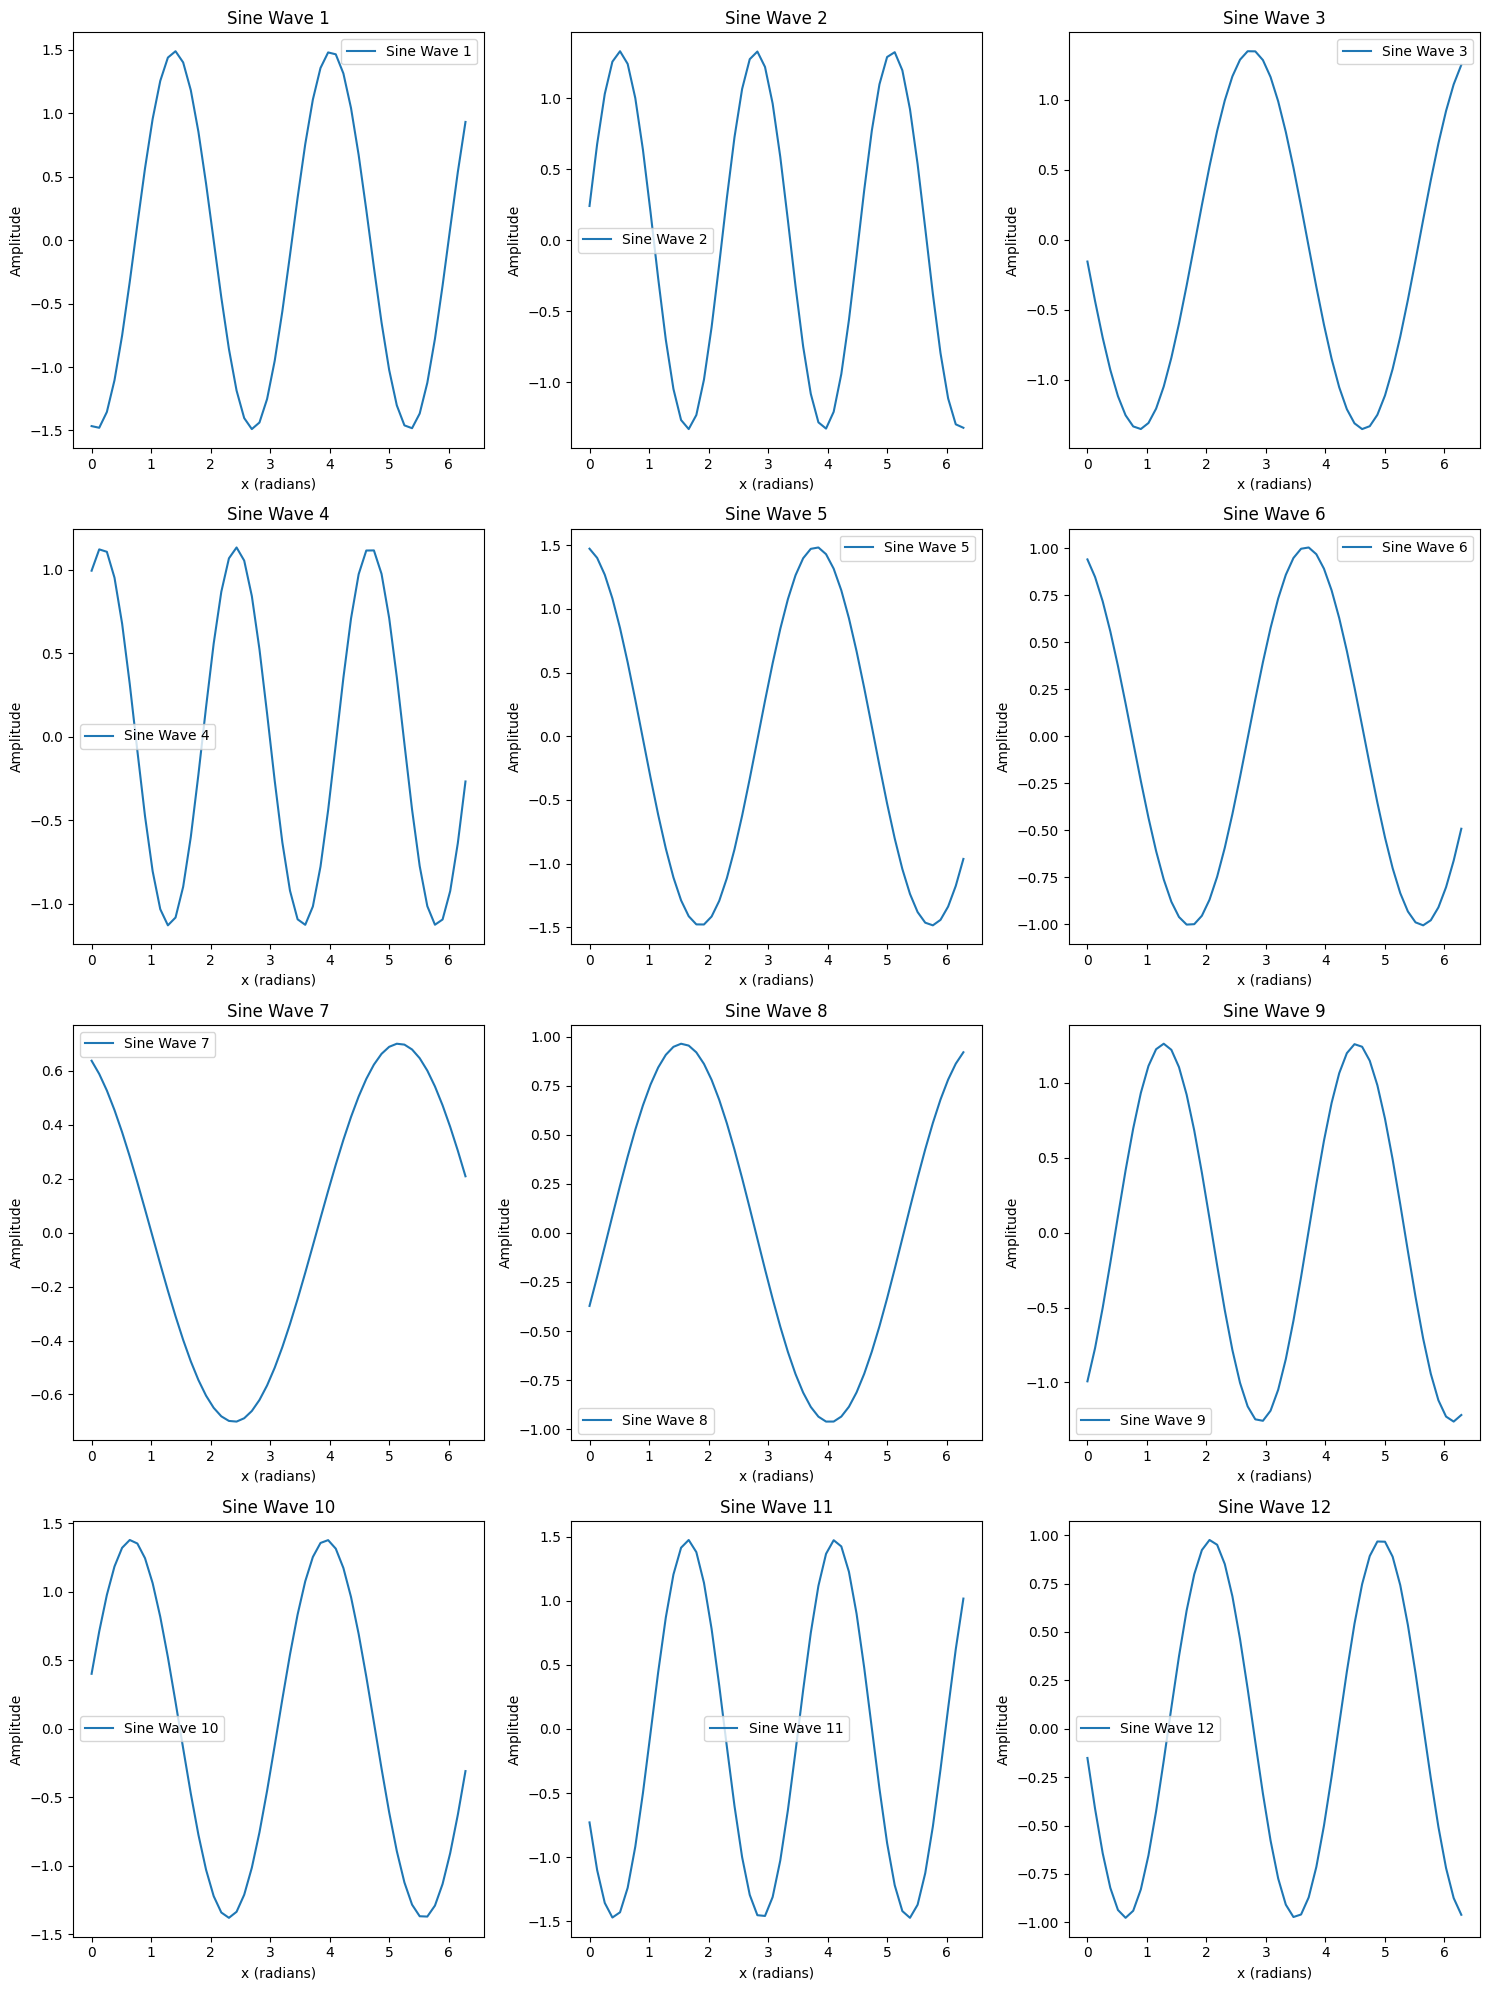

In [47]:
#Visualizing the real dataset of Sine Waves

num_waves = 12
real_data = generate_real_sine_waves(batch_size,output_dim,num_waves=12)

# Create subplots
rows = num_waves // 3  # Number of rows
cols = 3       # Number of columns
fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))

# Plot each sine wave in its subplot
x = np.linspace(0, 2 * np.pi, output_dim)
for idx, ax in enumerate(axes.flat):
    ax.plot(x, real_data[idx], label=f"Sine Wave {idx + 1}")
    ax.set_title(f"Sine Wave {idx + 1}")
    ax.set_xlabel("x (radians)")
    ax.set_ylabel("Amplitude")
    ax.legend()

plt.tight_layout()
plt.show()




In [10]:
criterion = nn.BCELoss()

Epoch 0, Discriminator Loss: 0.7593666315078735, Generator Loss: 2.3158233165740967


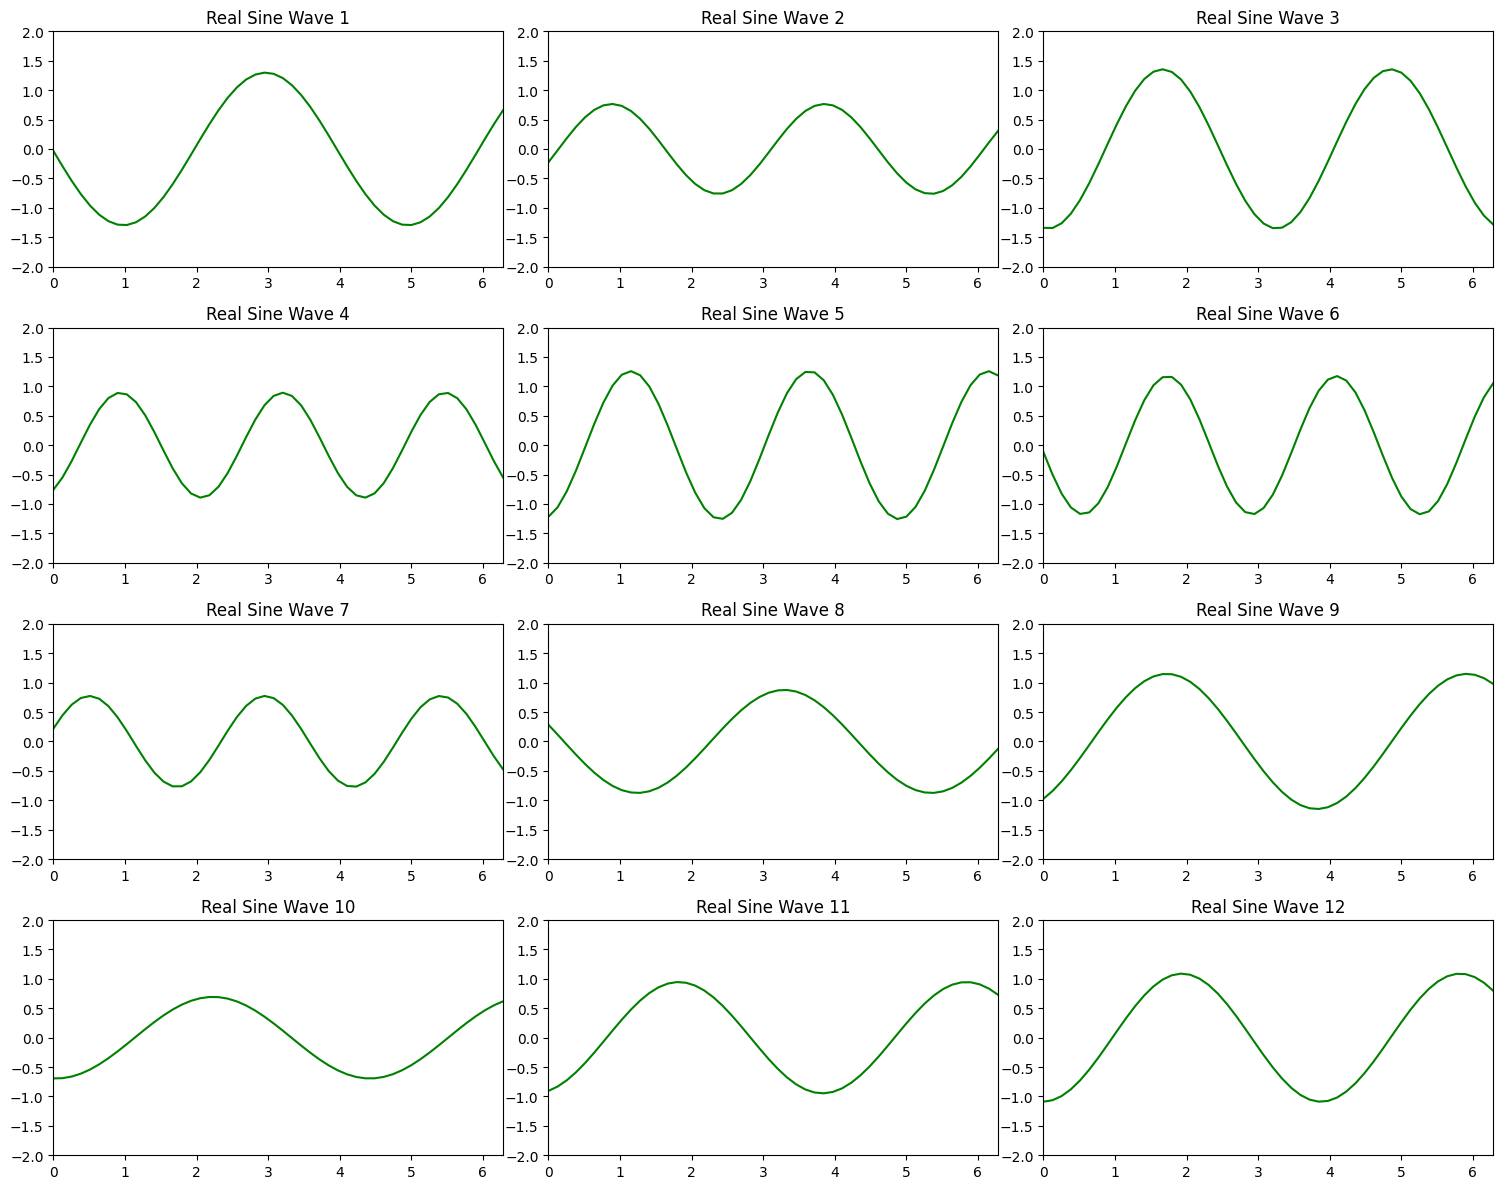

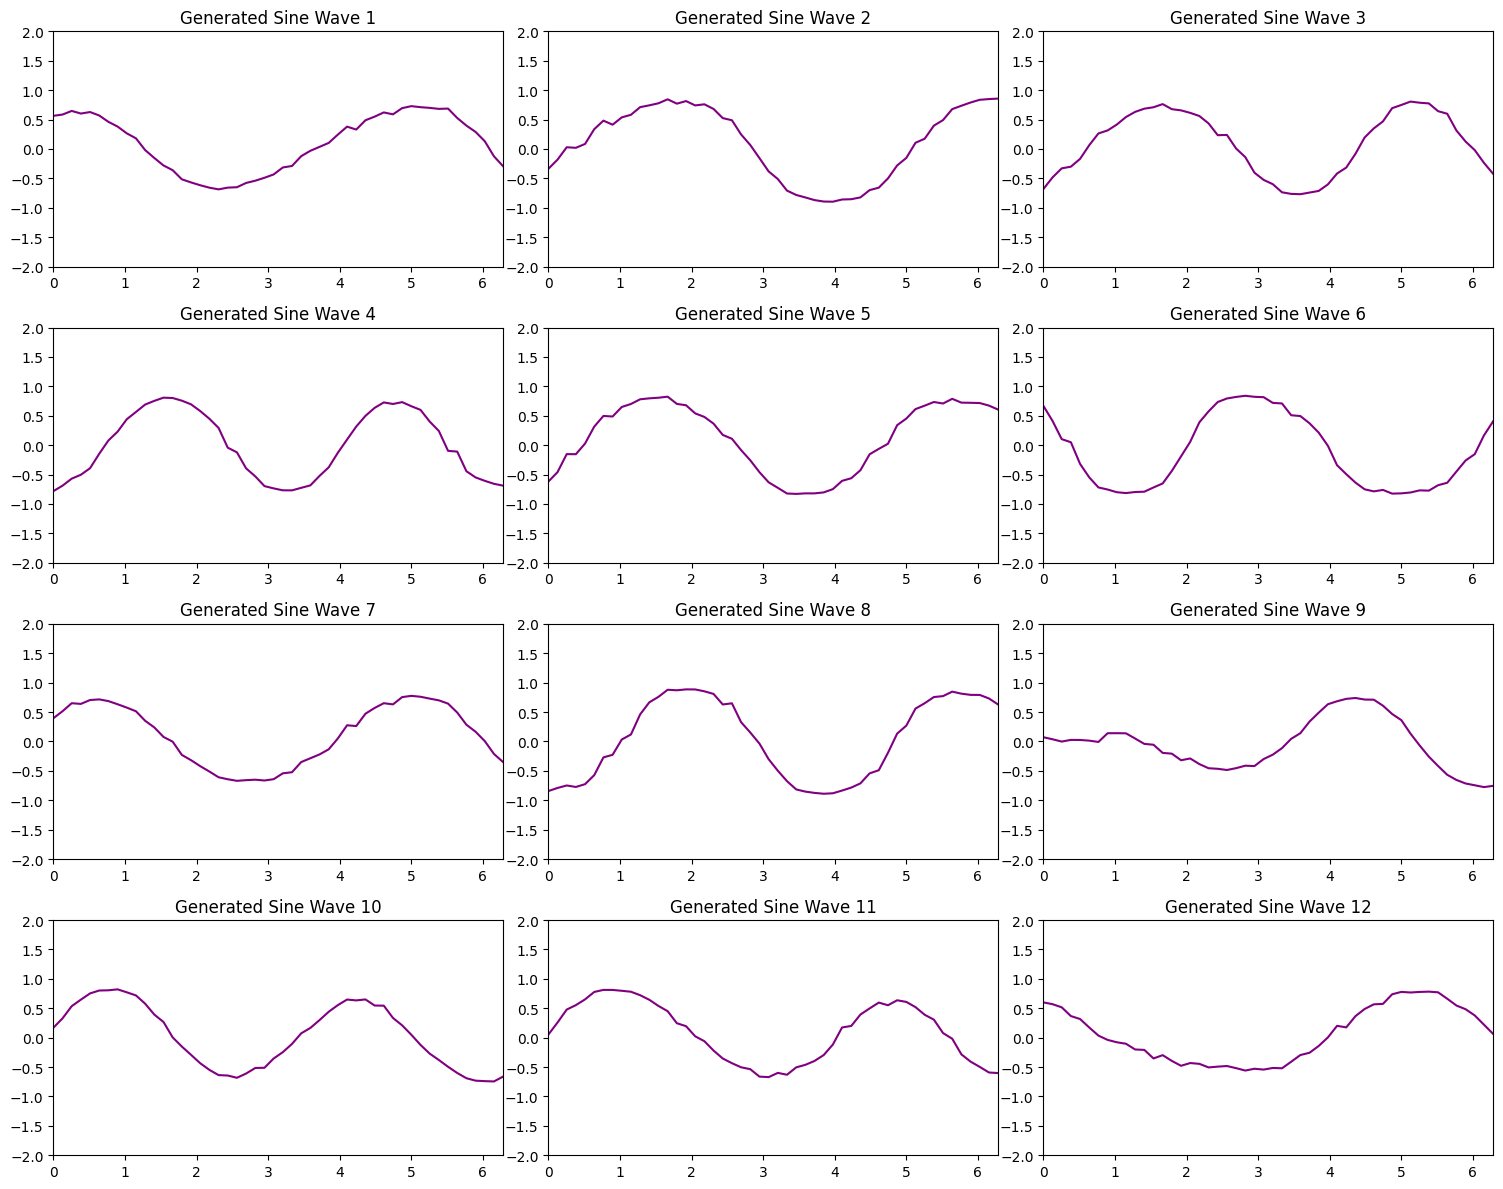

Epoch 100, Discriminator Loss: 0.496540367603302, Generator Loss: 2.597102642059326


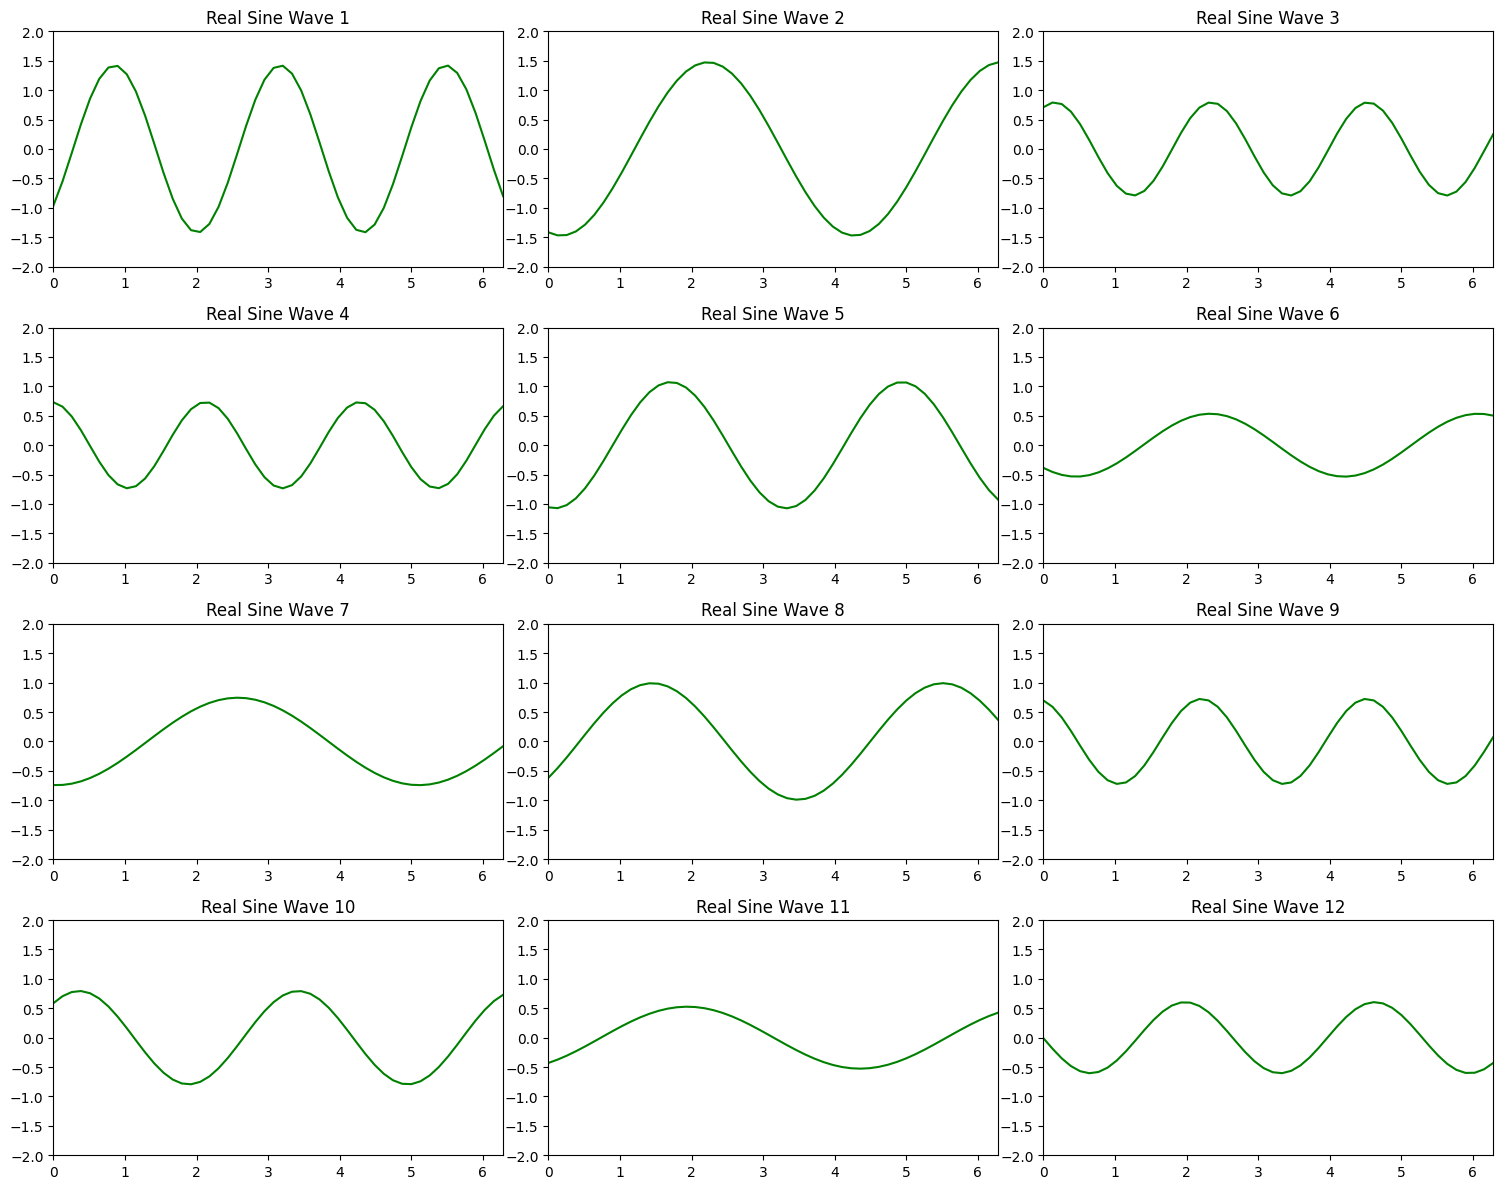

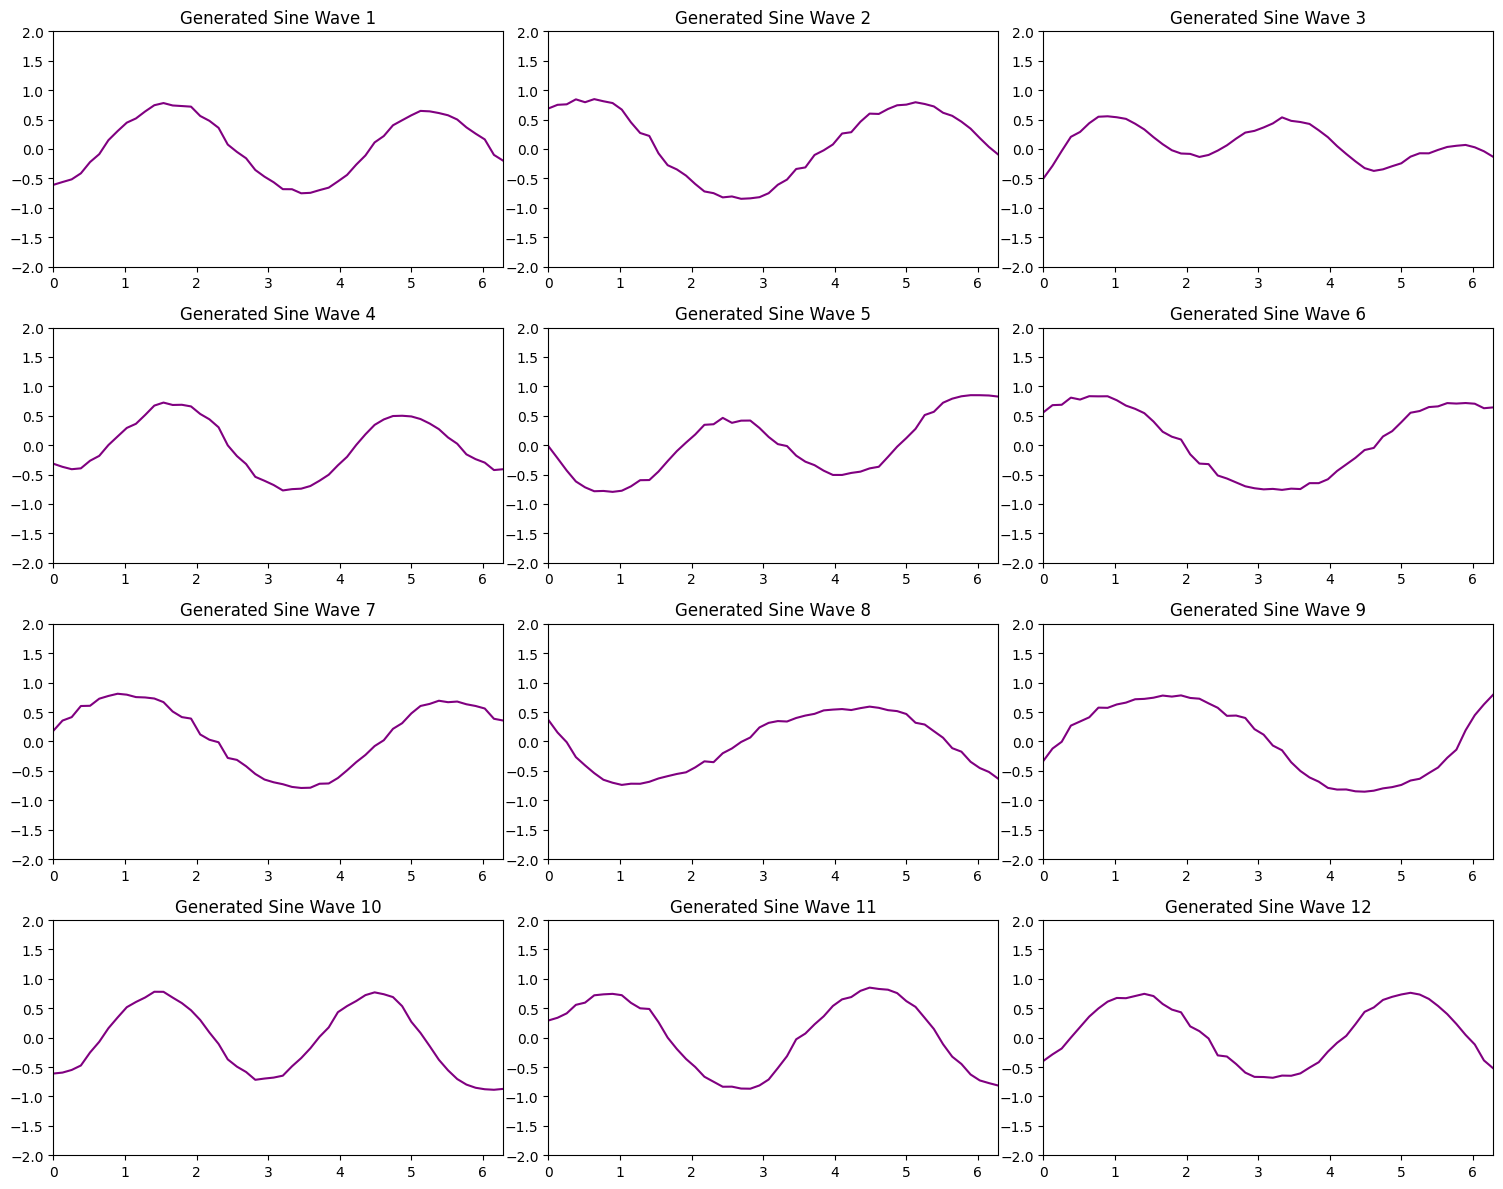

Epoch 200, Discriminator Loss: 0.5035719275474548, Generator Loss: 2.646908760070801


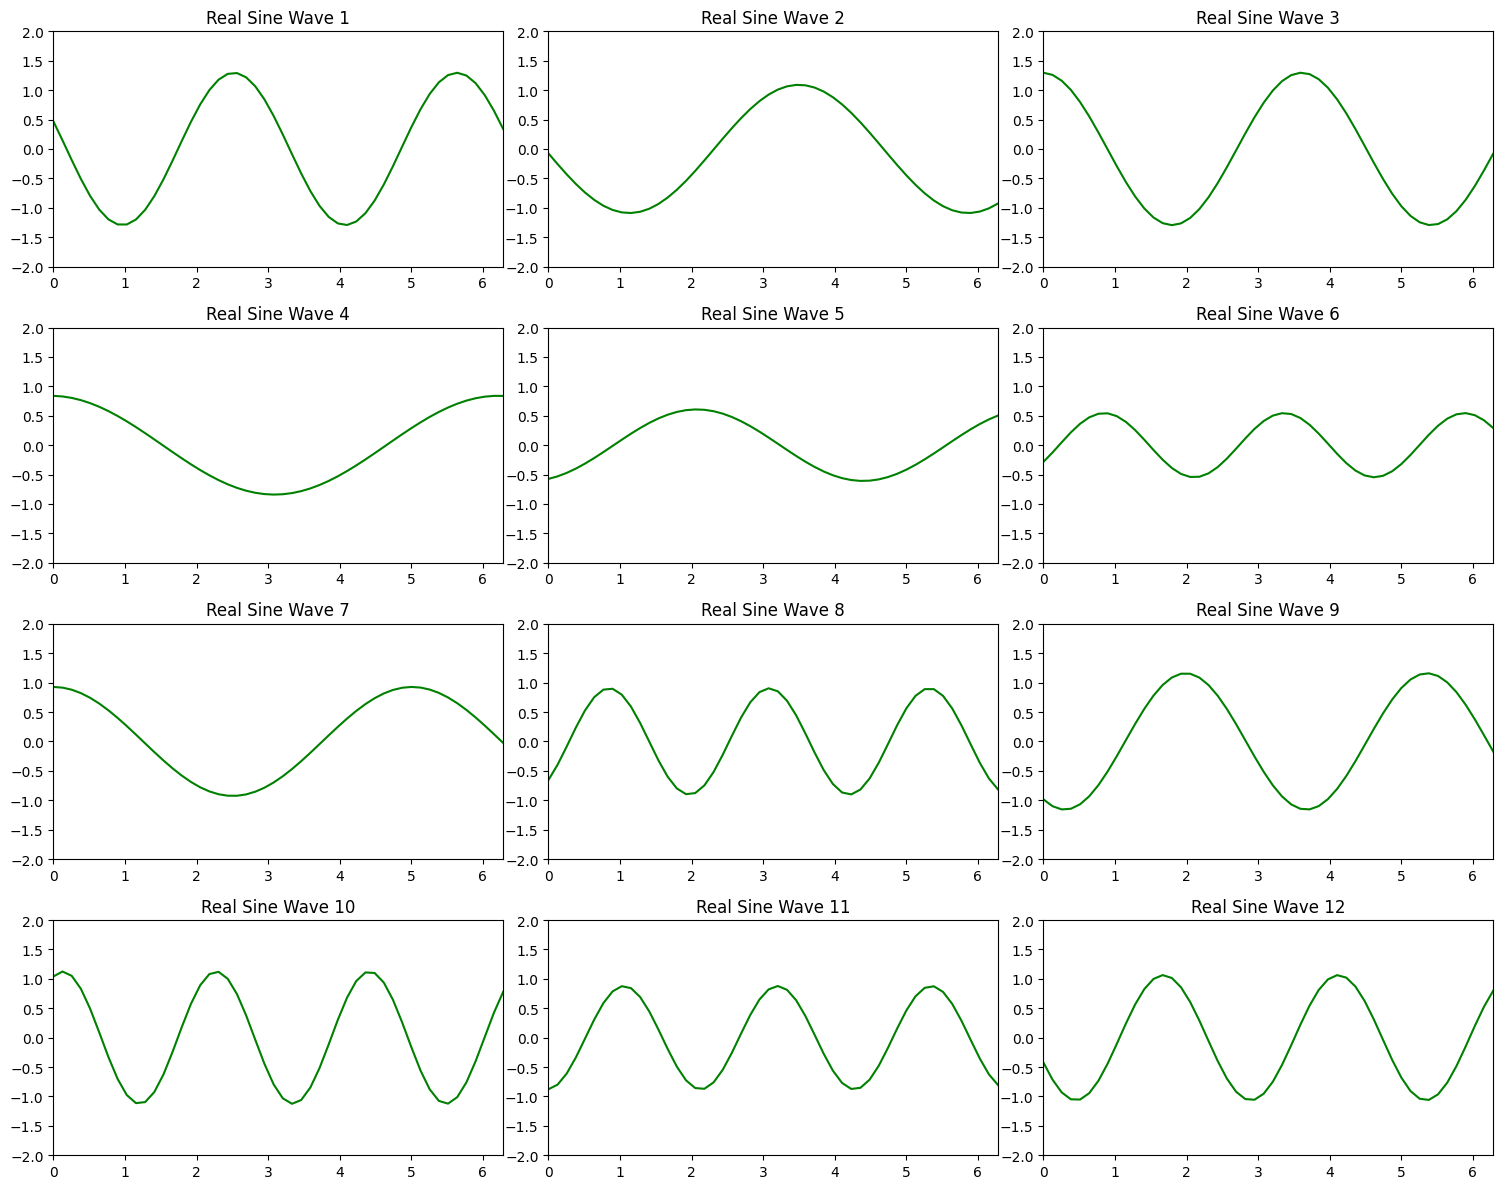

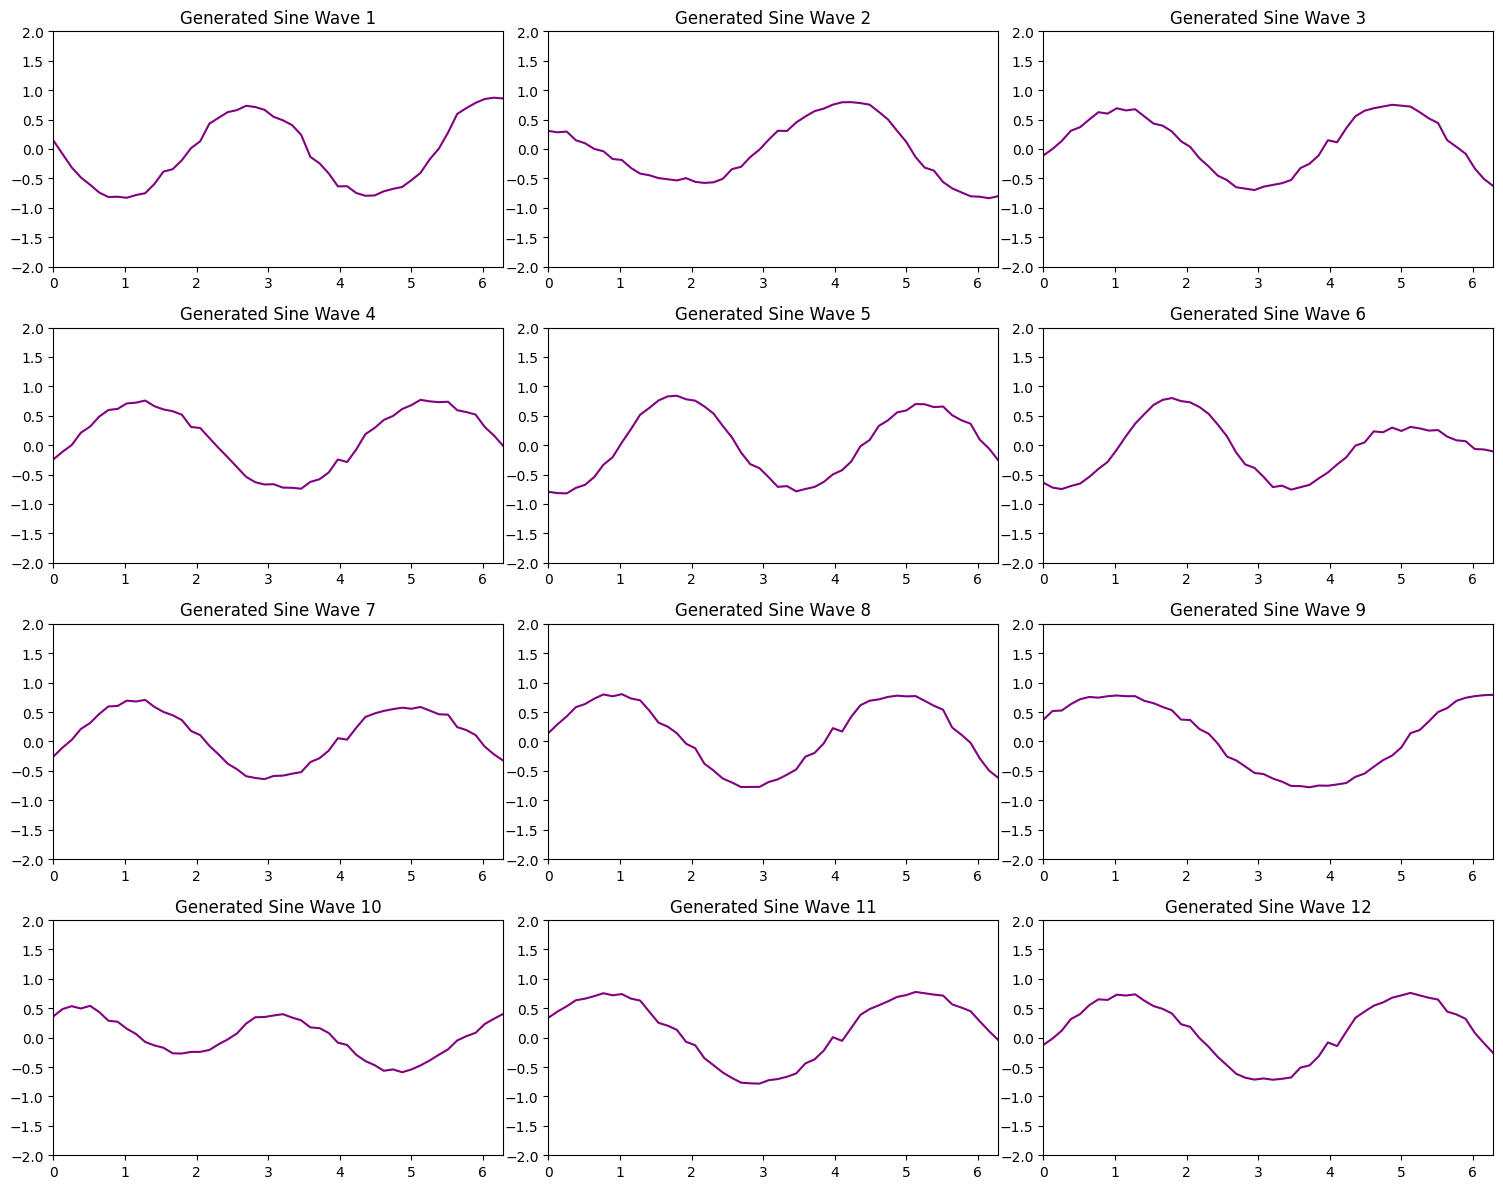

Epoch 300, Discriminator Loss: 0.24827197194099426, Generator Loss: 2.106909990310669


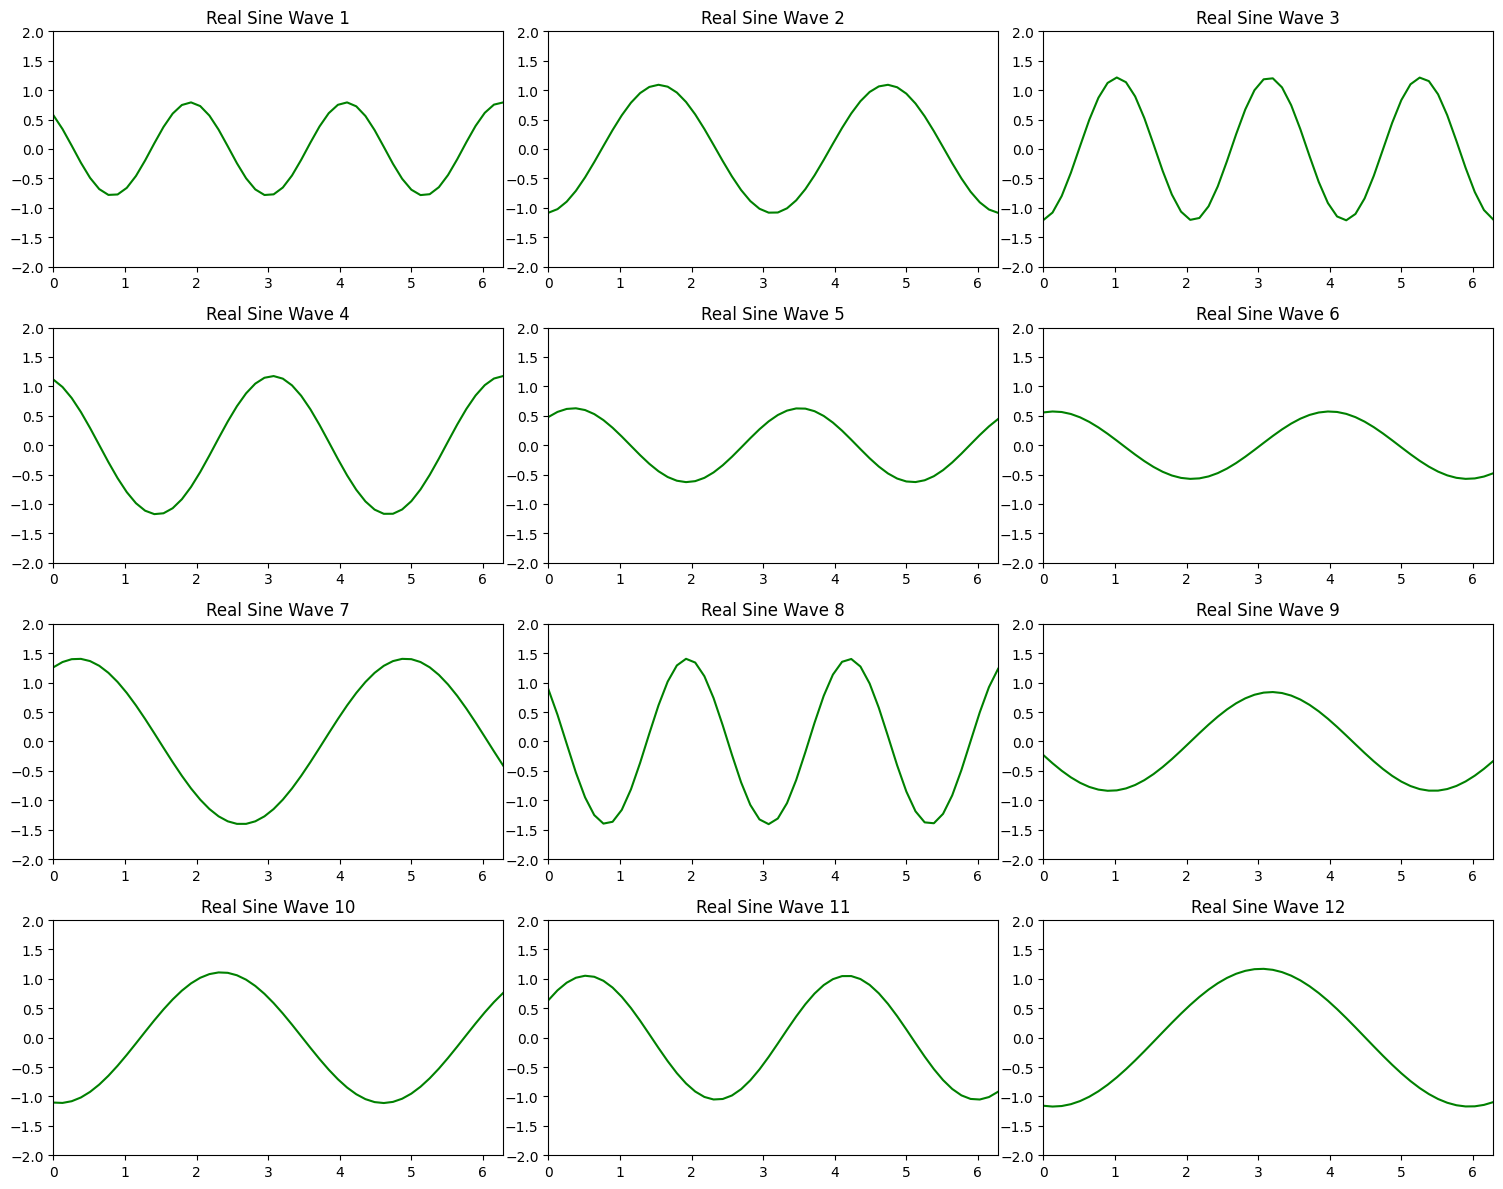

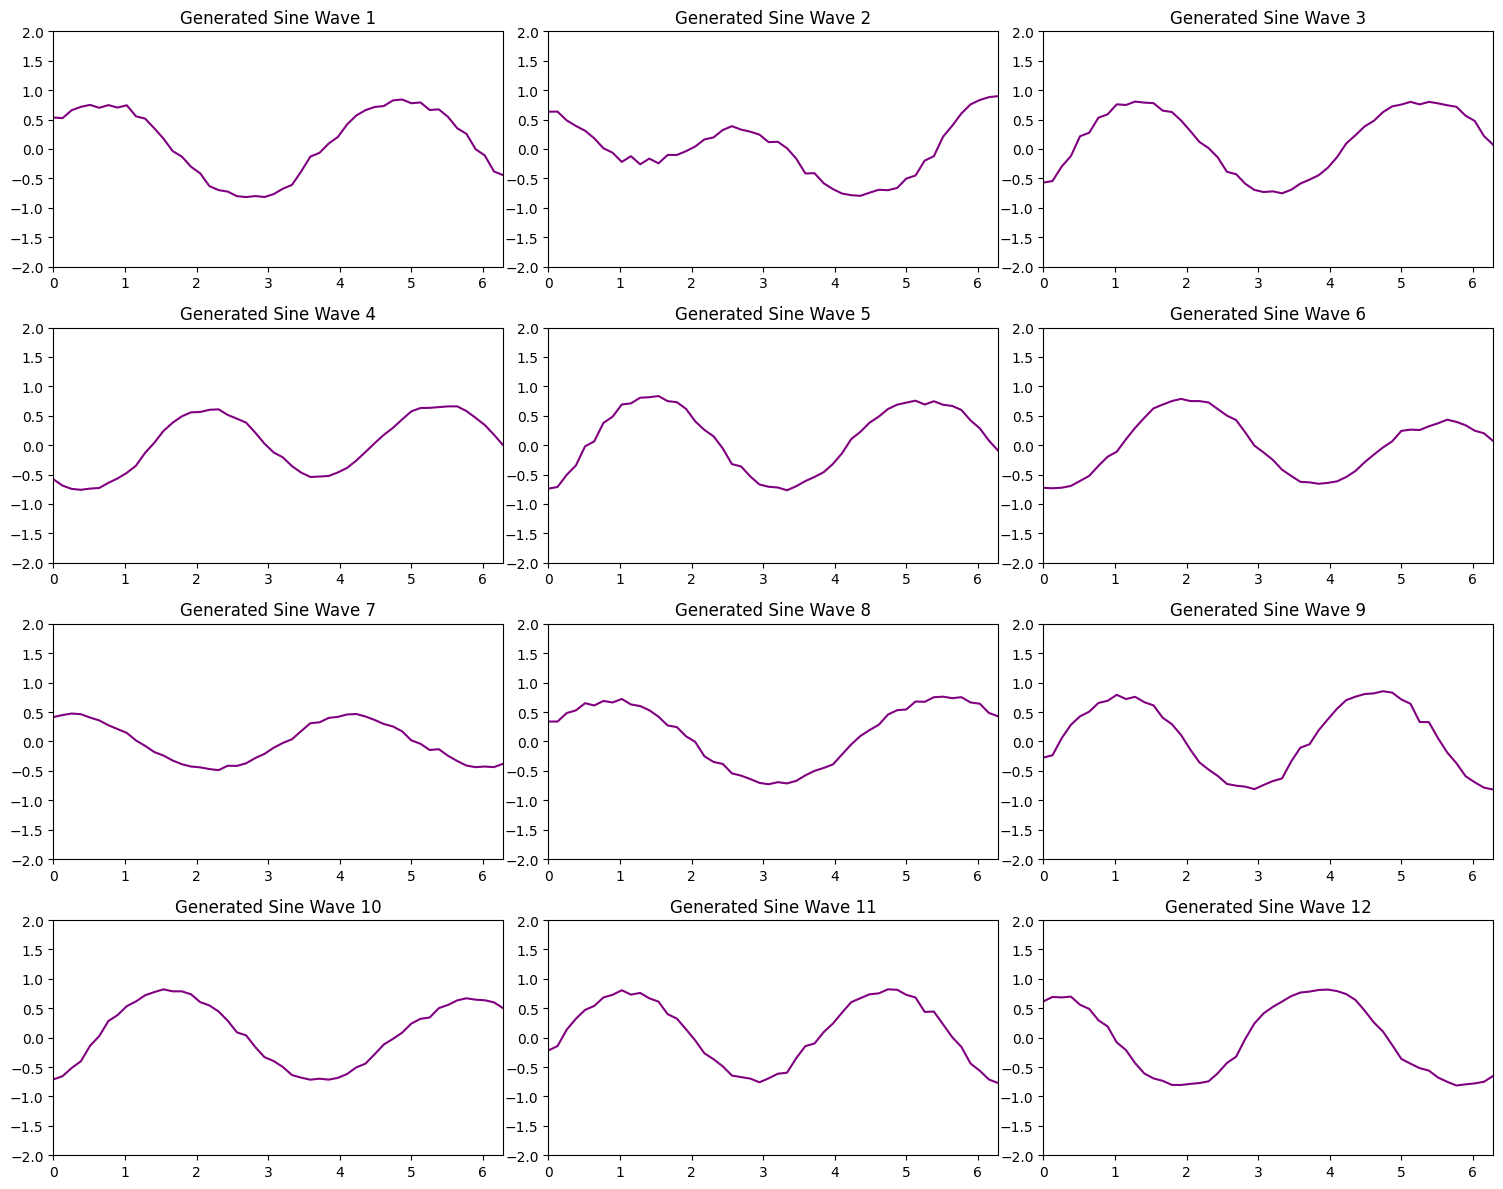

Epoch 400, Discriminator Loss: 0.8634450435638428, Generator Loss: 3.4929211139678955


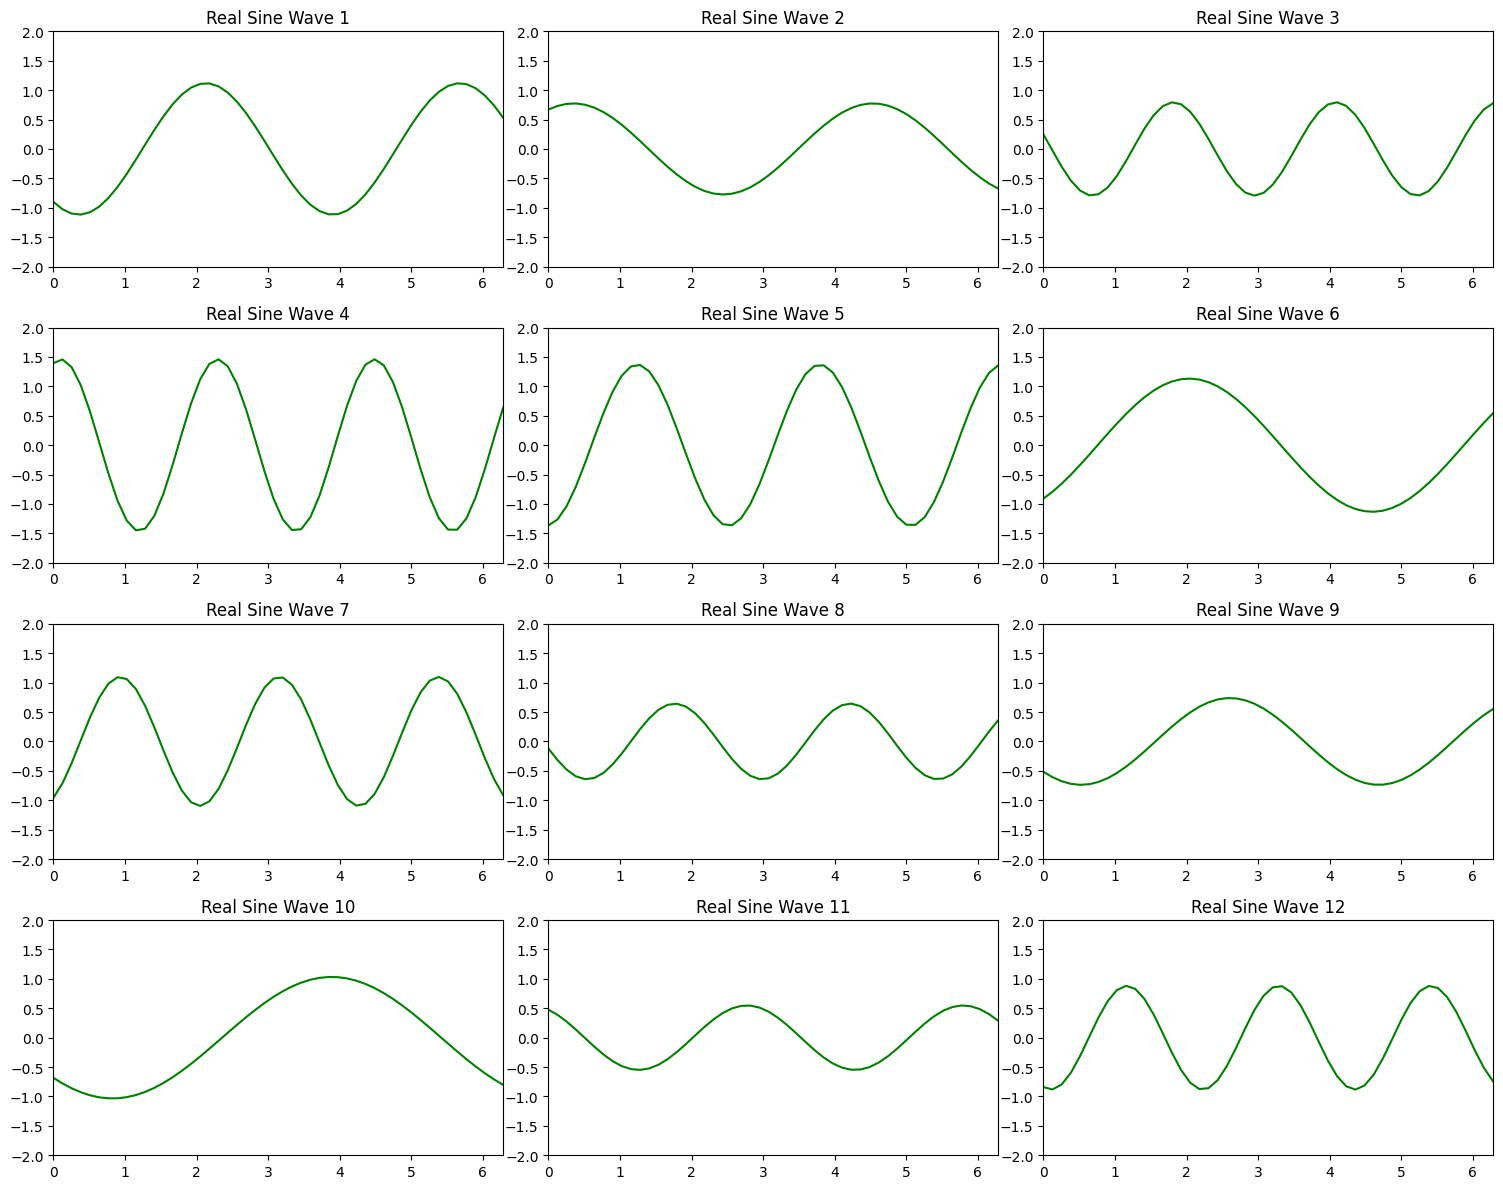

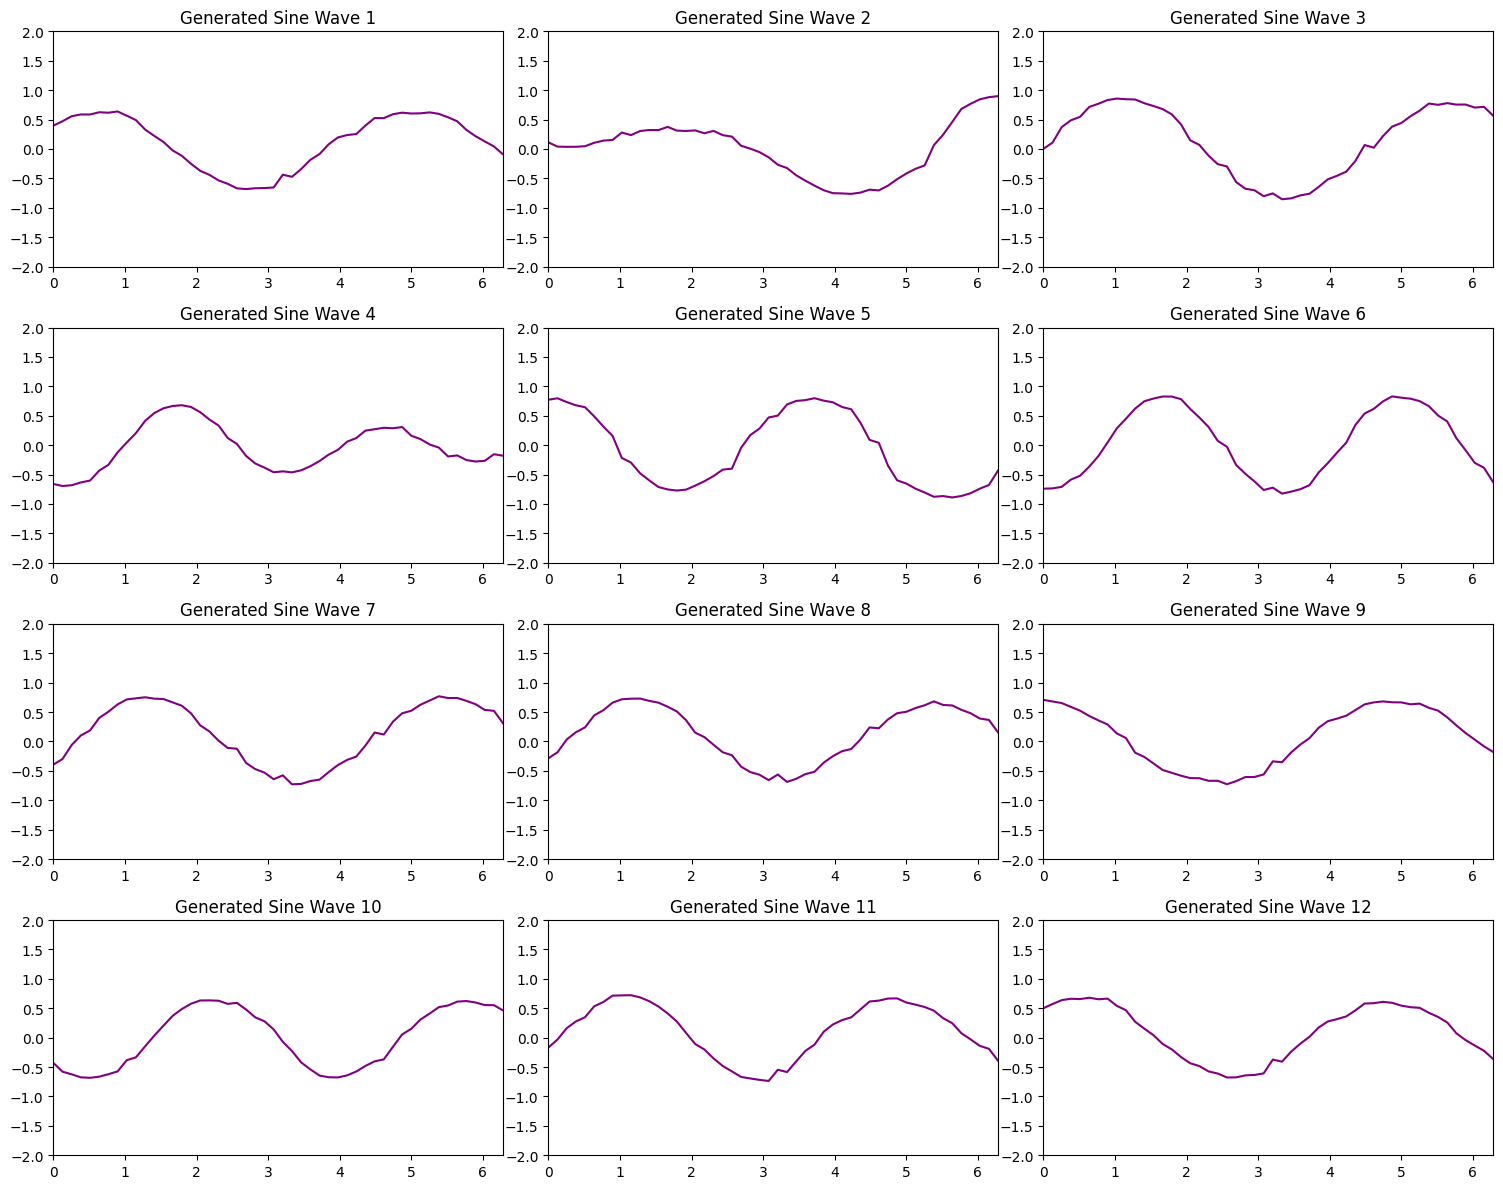

Epoch 500, Discriminator Loss: 0.4026973843574524, Generator Loss: 2.3314857482910156


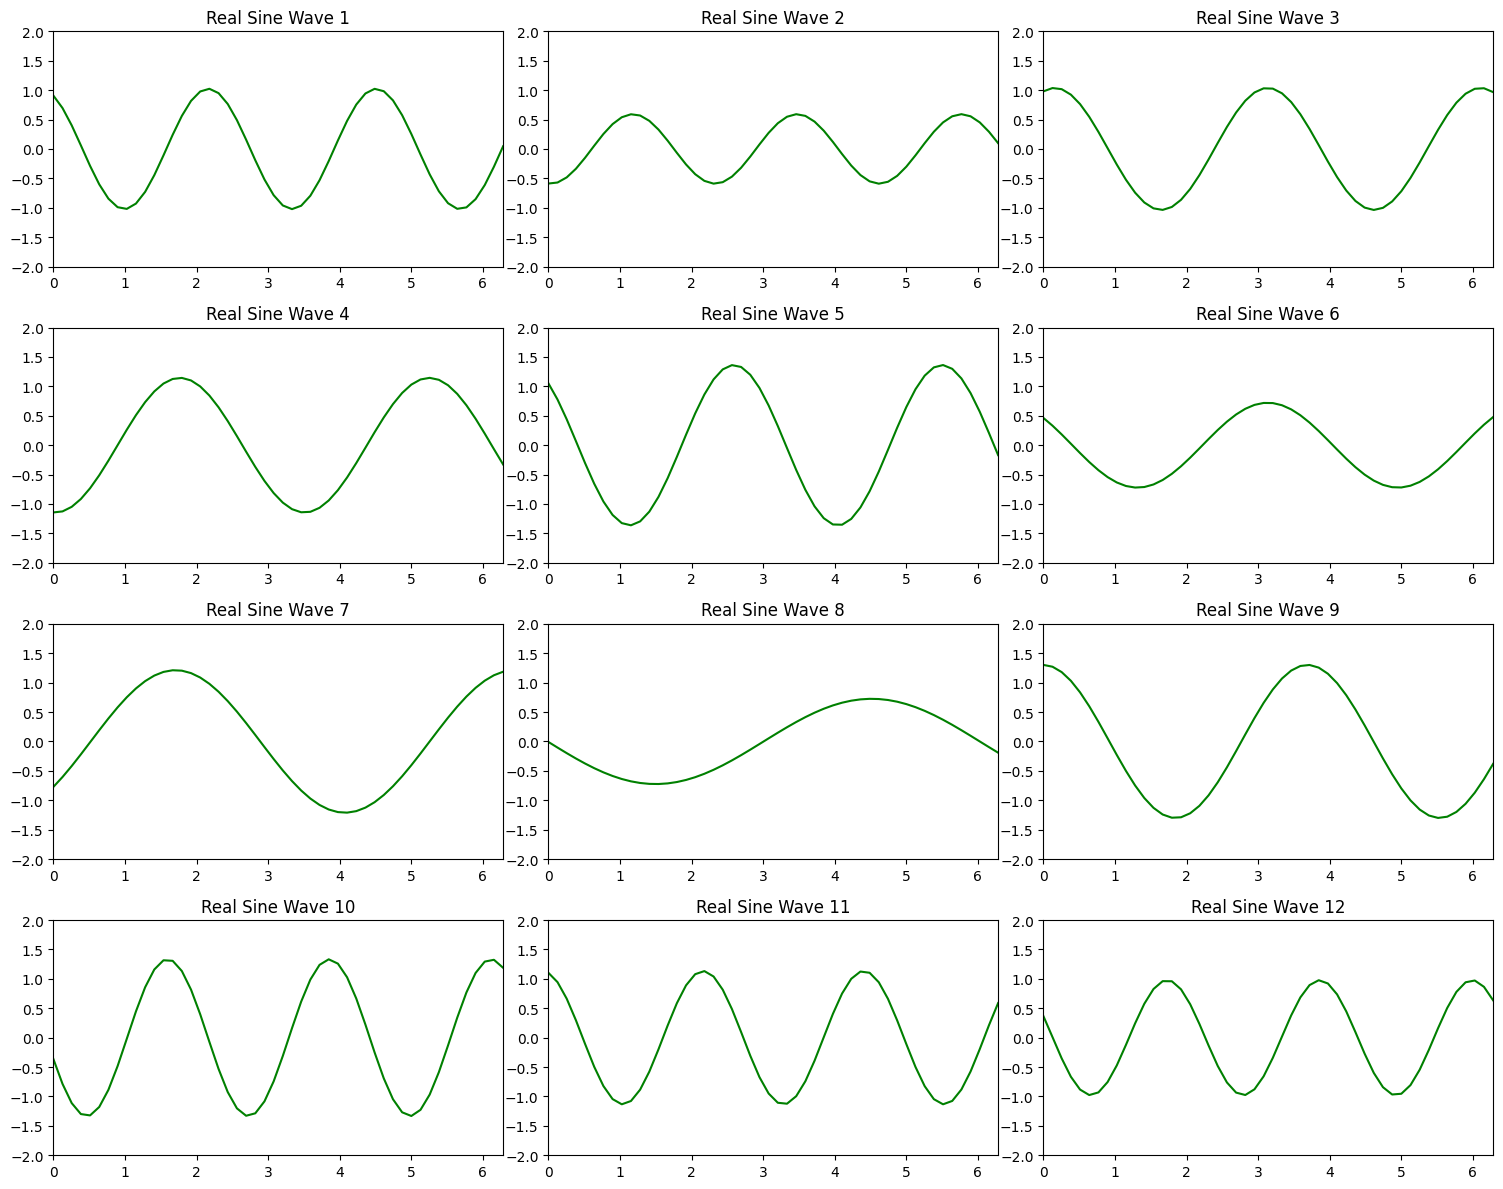

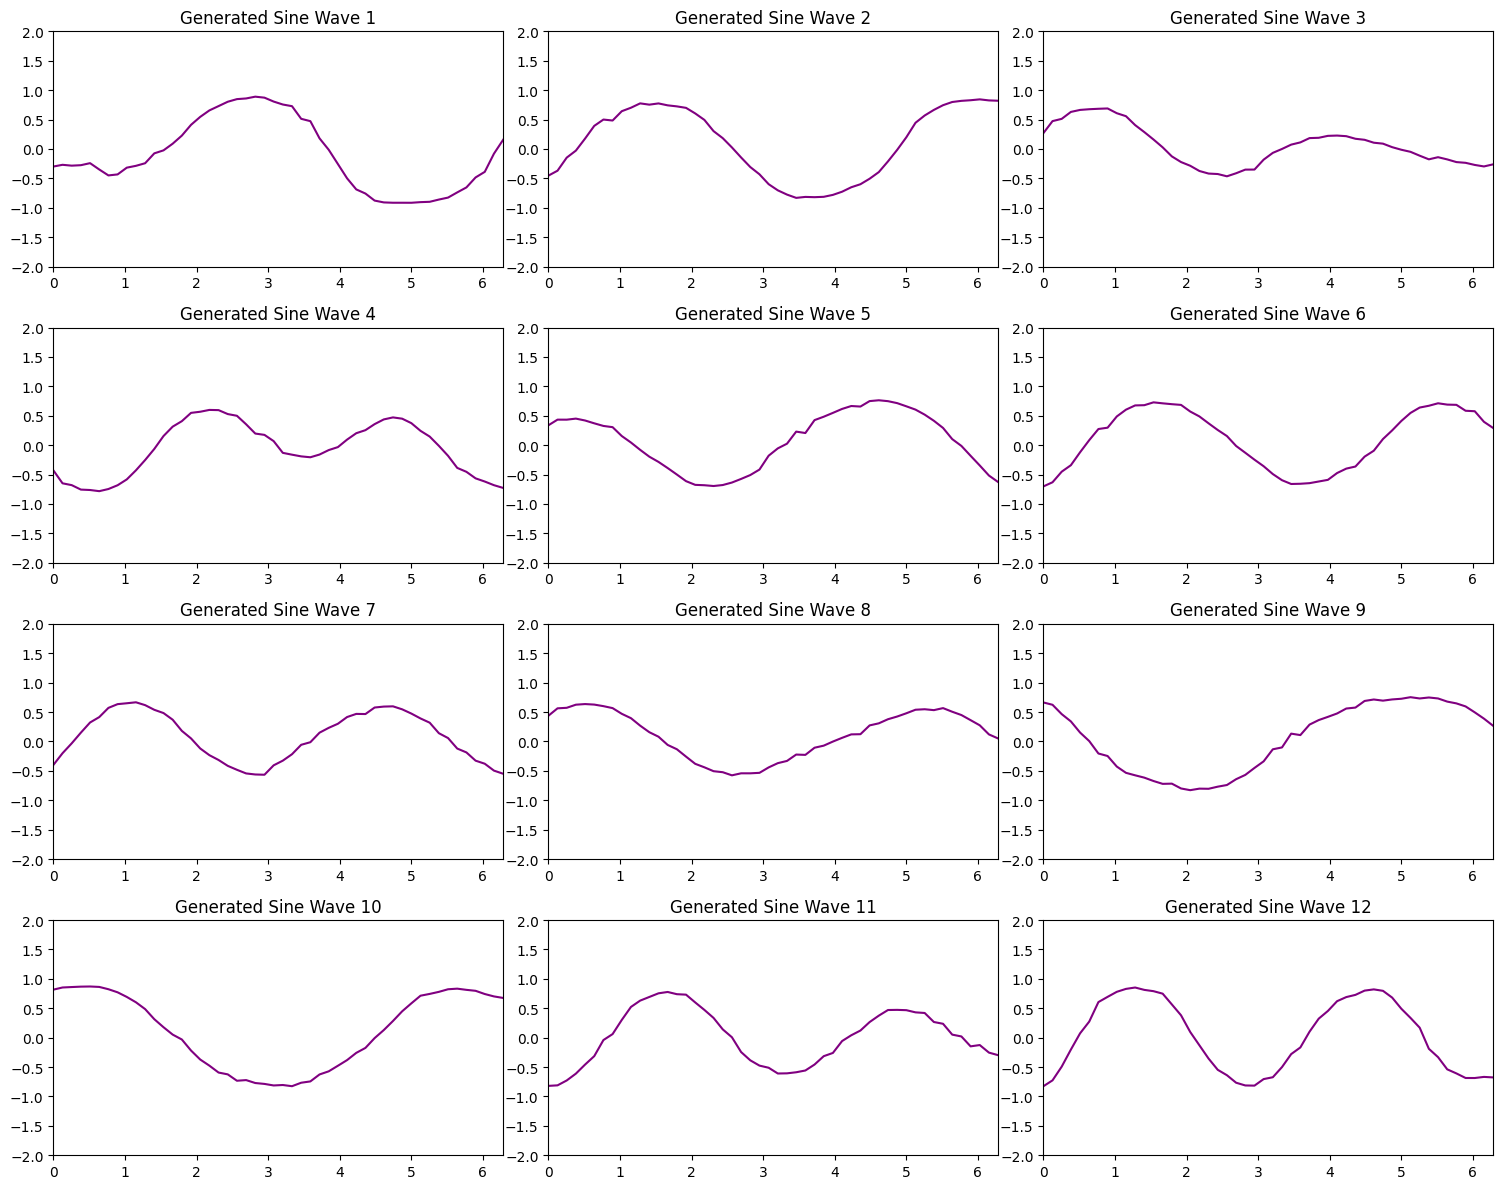

Epoch 600, Discriminator Loss: 0.589552640914917, Generator Loss: 2.3391149044036865


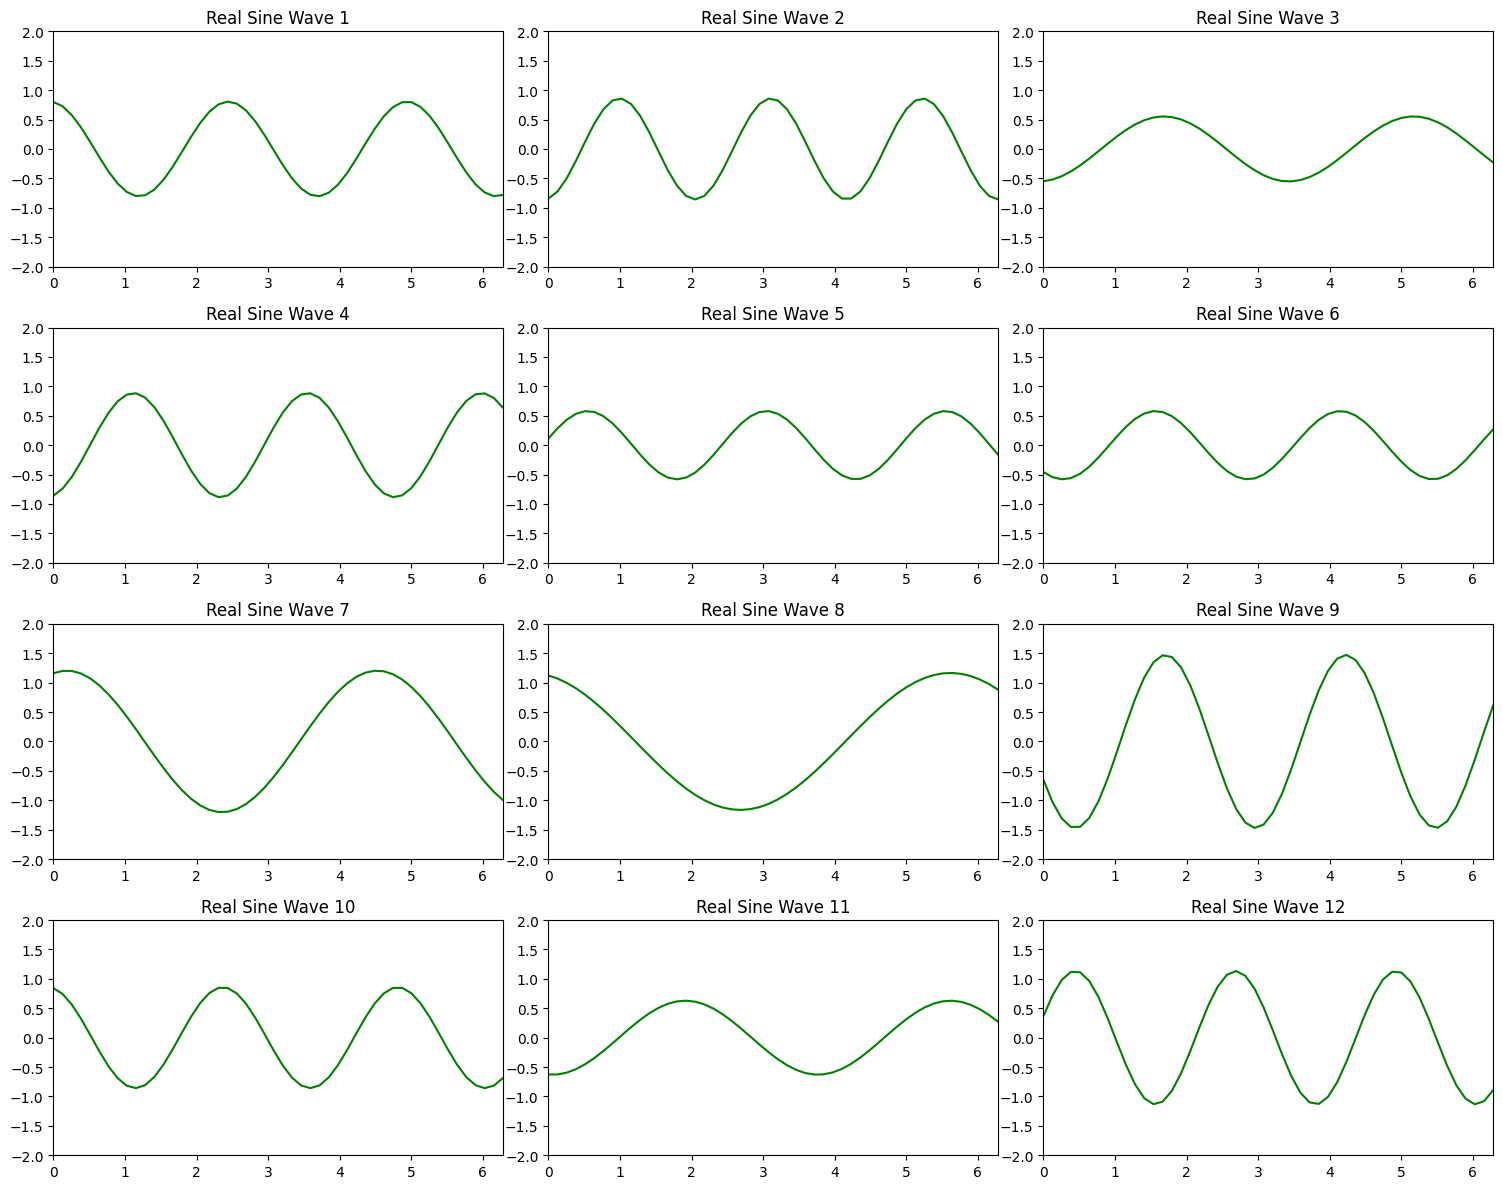

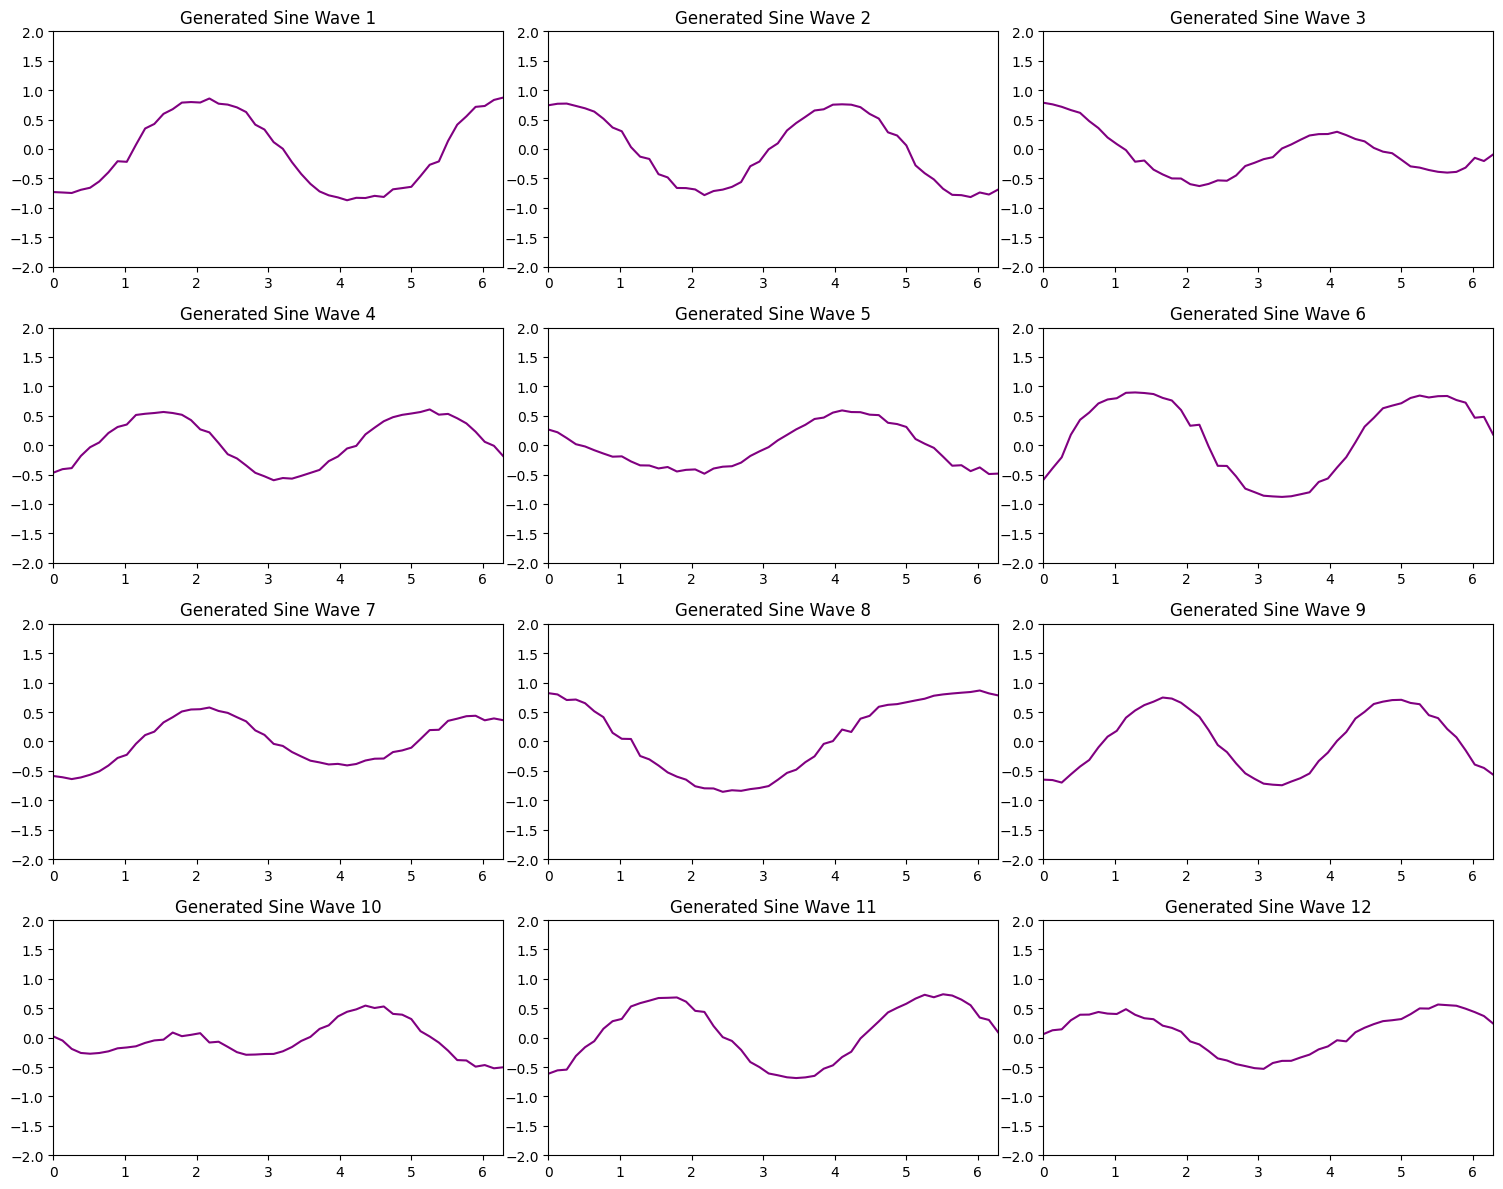

Epoch 700, Discriminator Loss: 0.6417585611343384, Generator Loss: 2.502667188644409


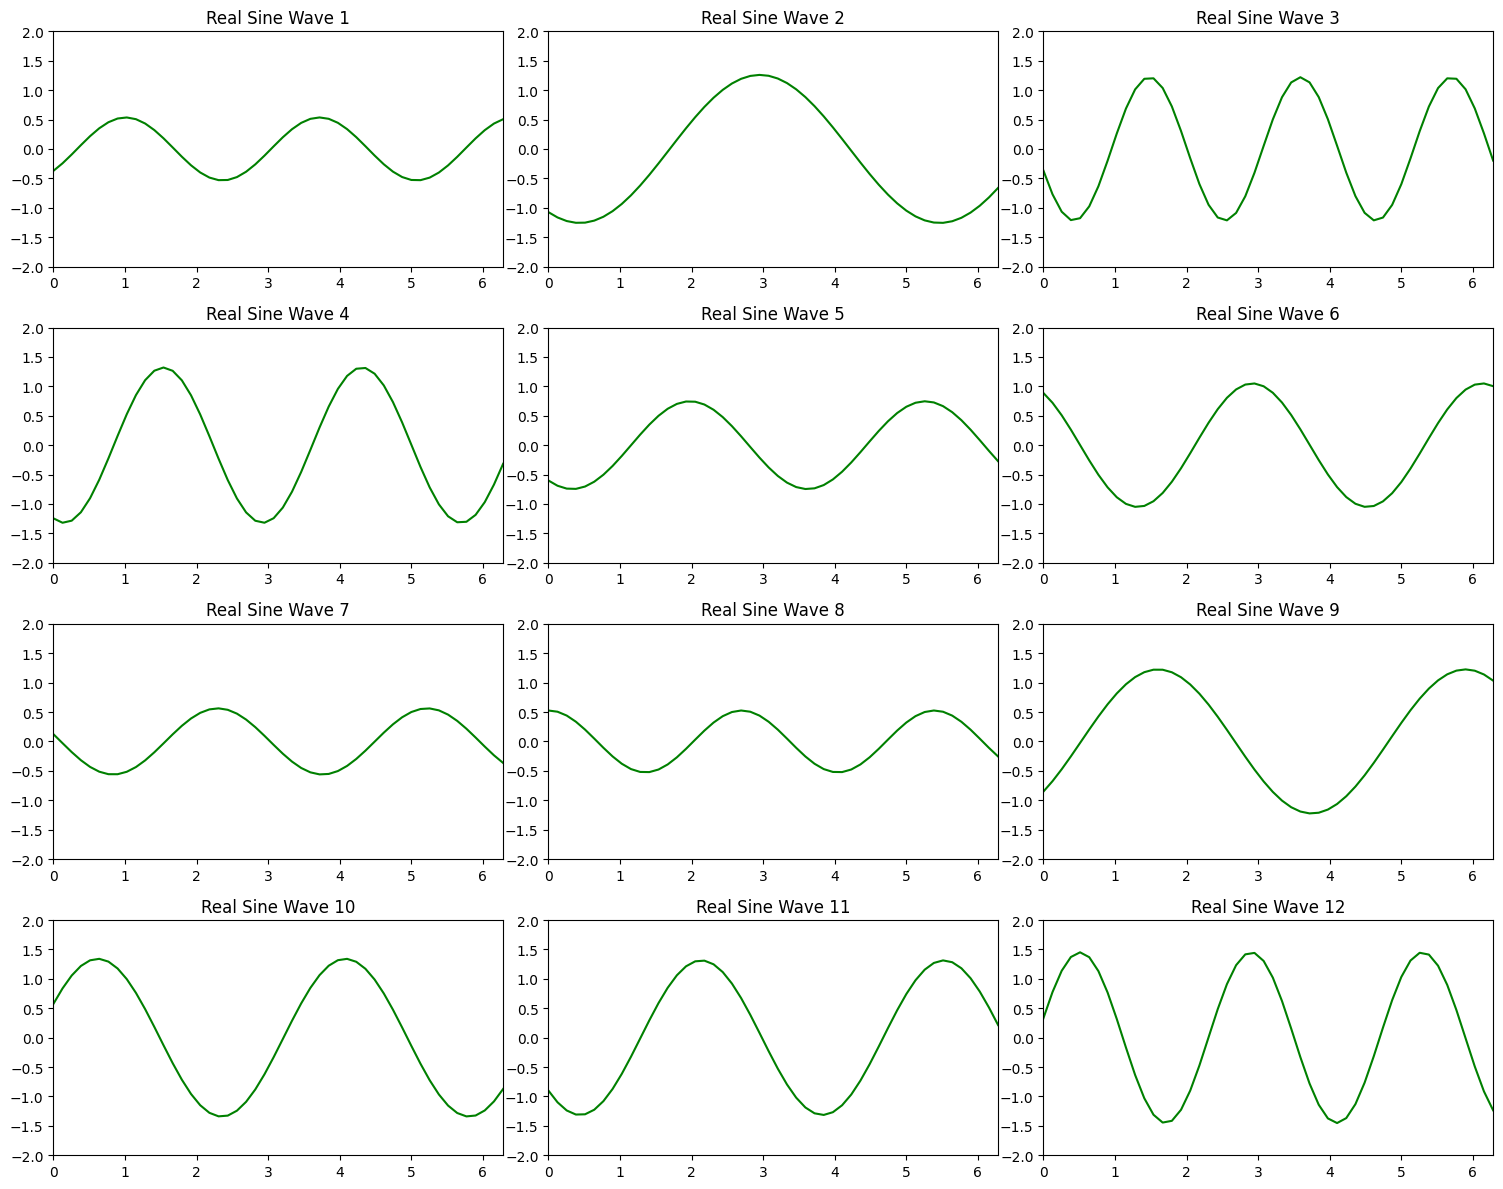

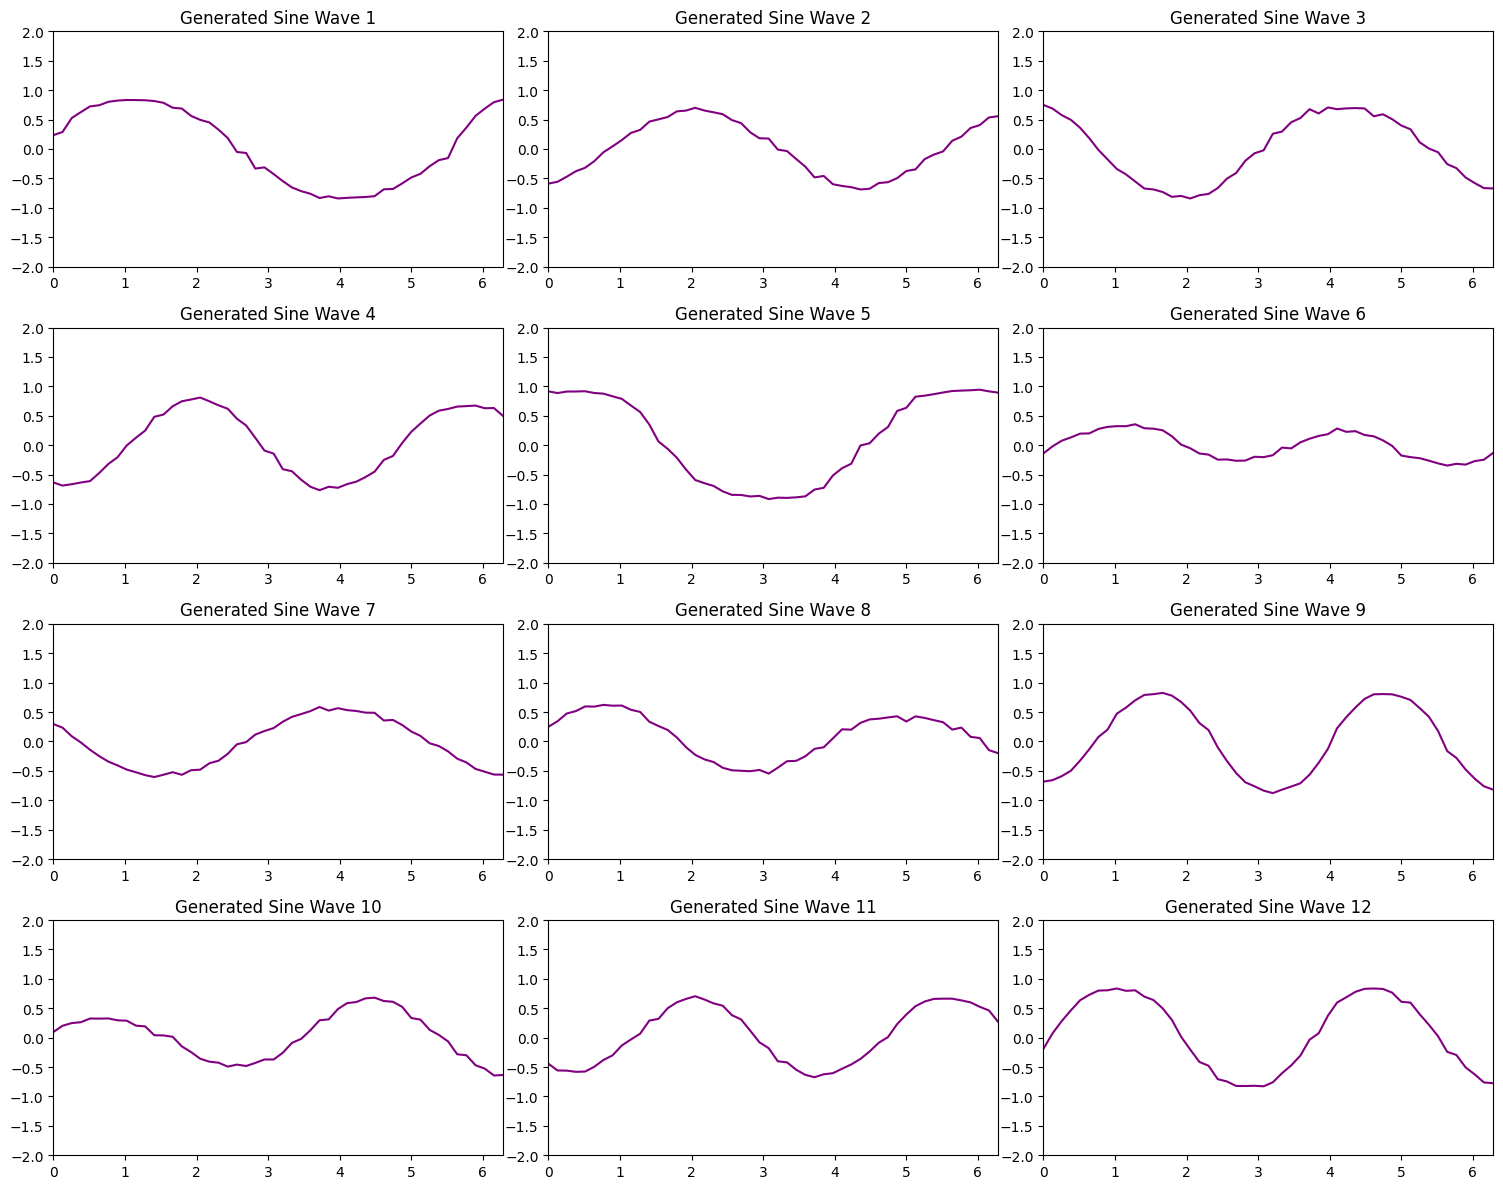

Epoch 800, Discriminator Loss: 0.31736254692077637, Generator Loss: 2.6882998943328857


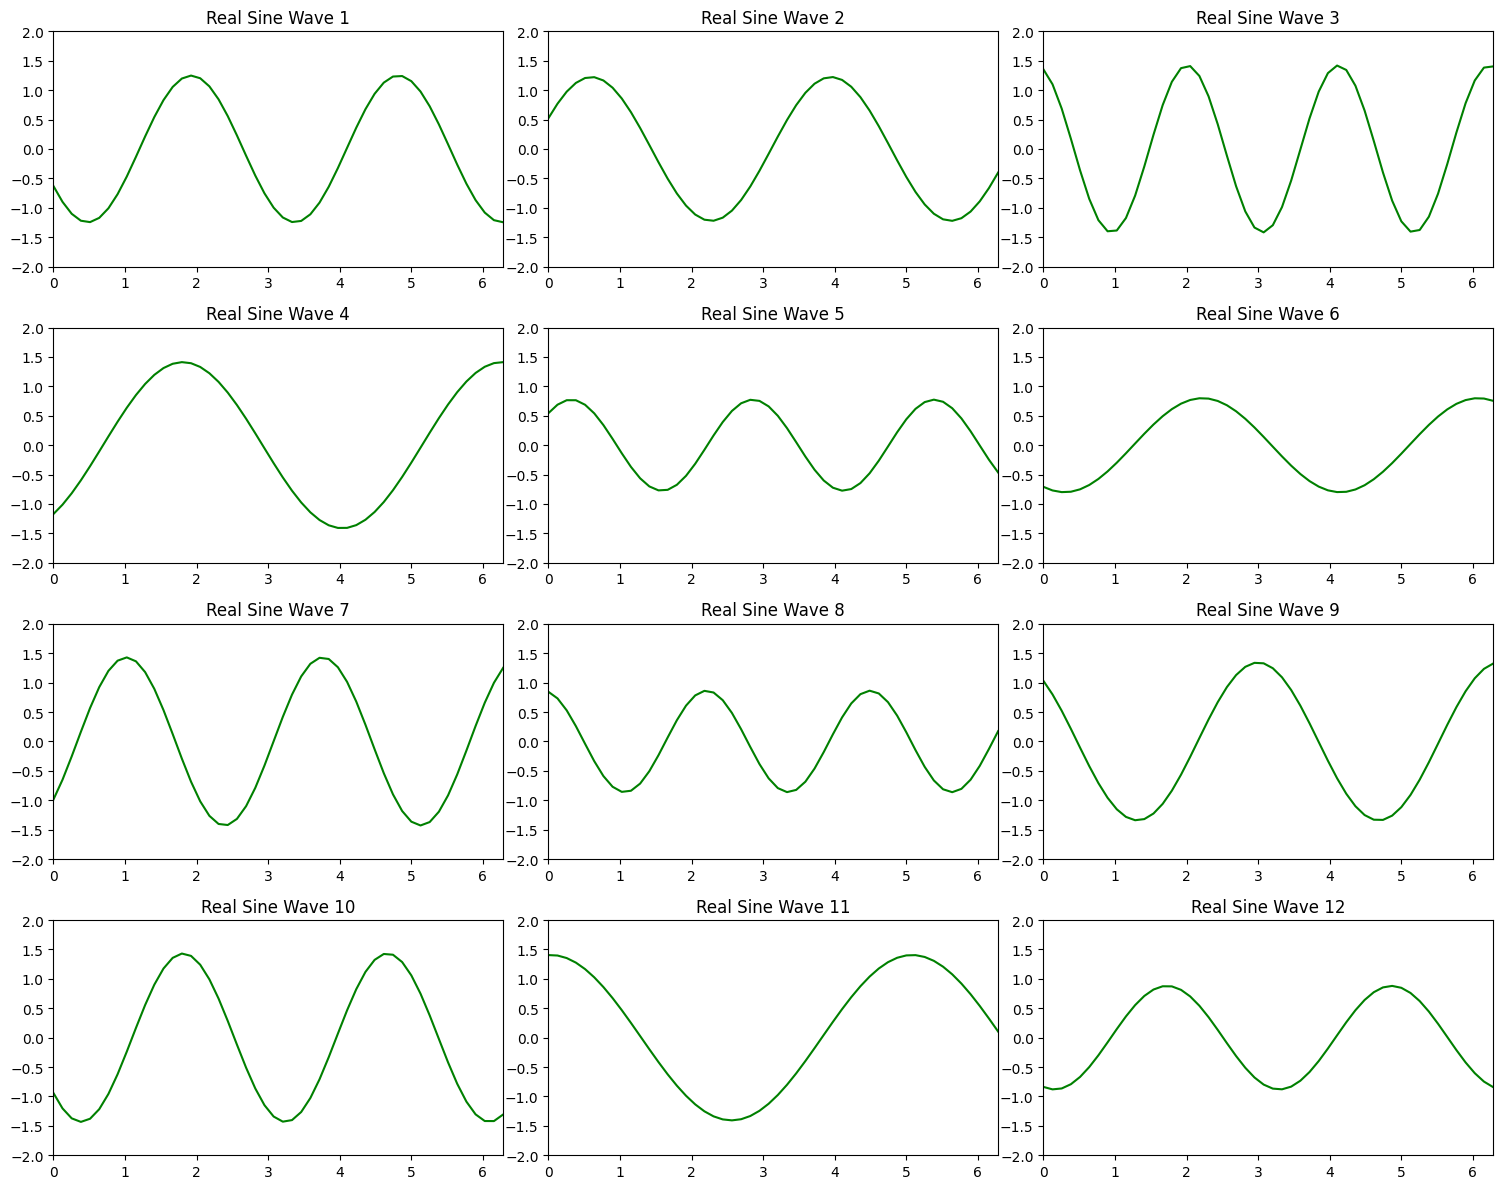

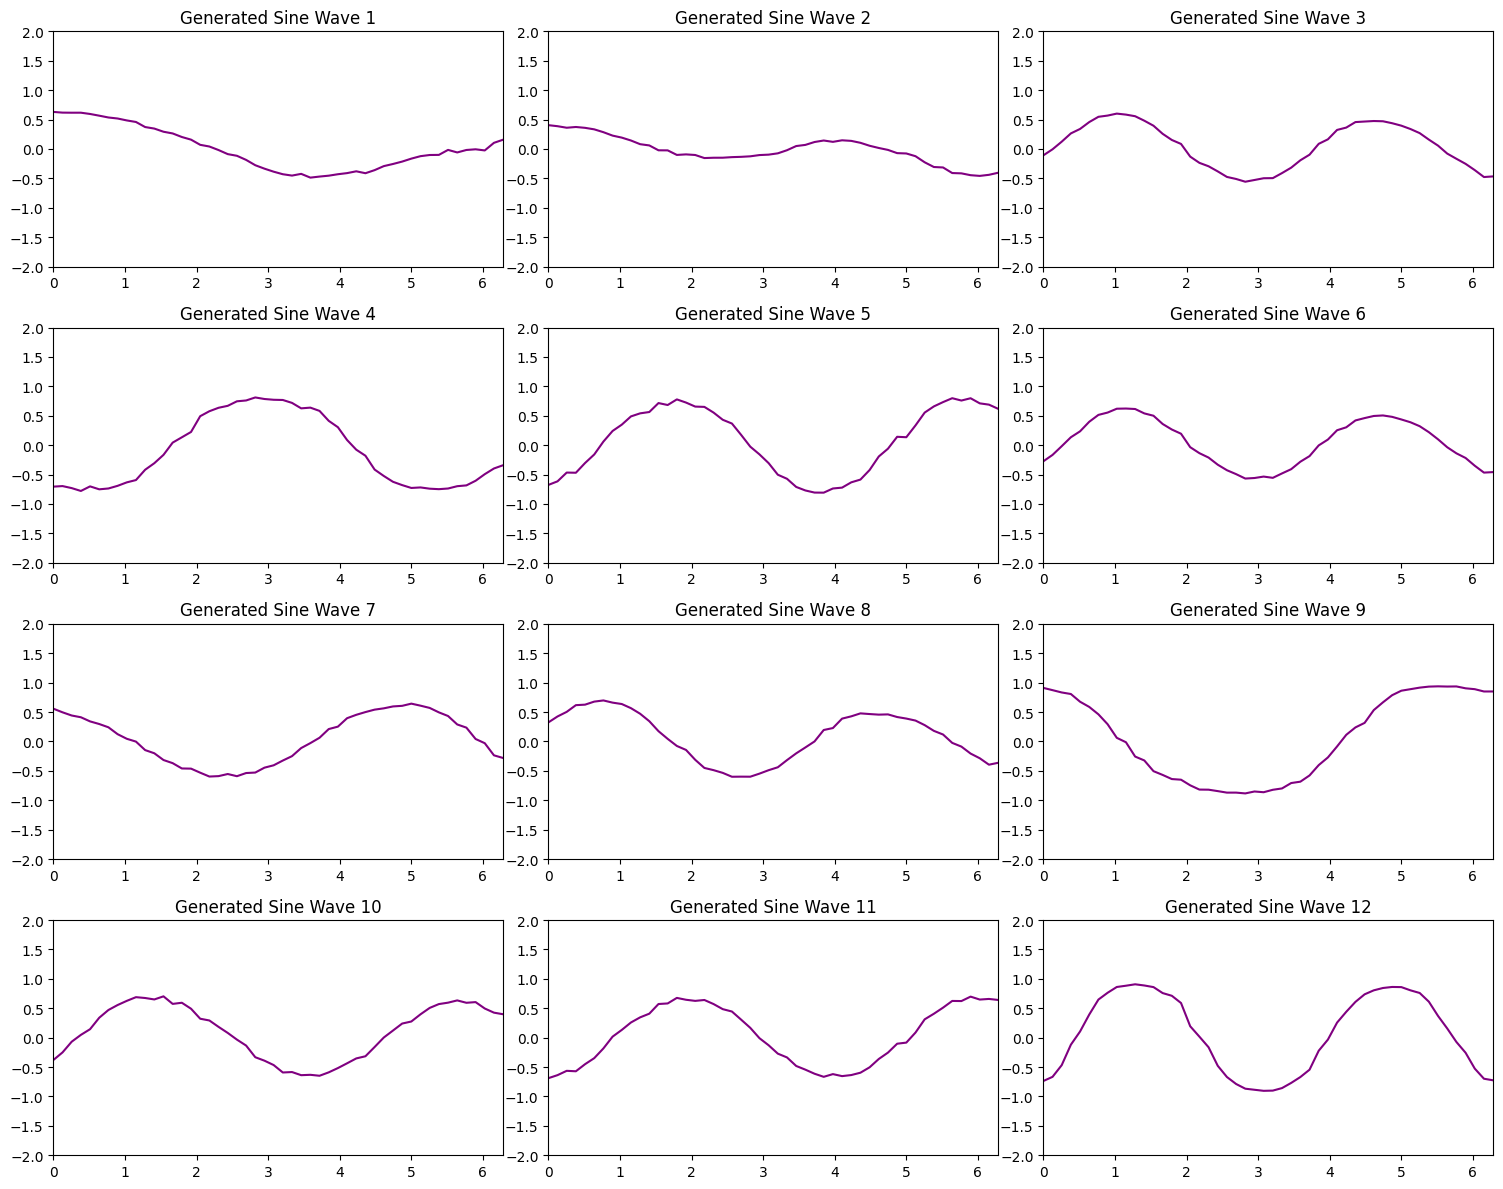

Epoch 900, Discriminator Loss: 0.13081760704517365, Generator Loss: 2.3400535583496094


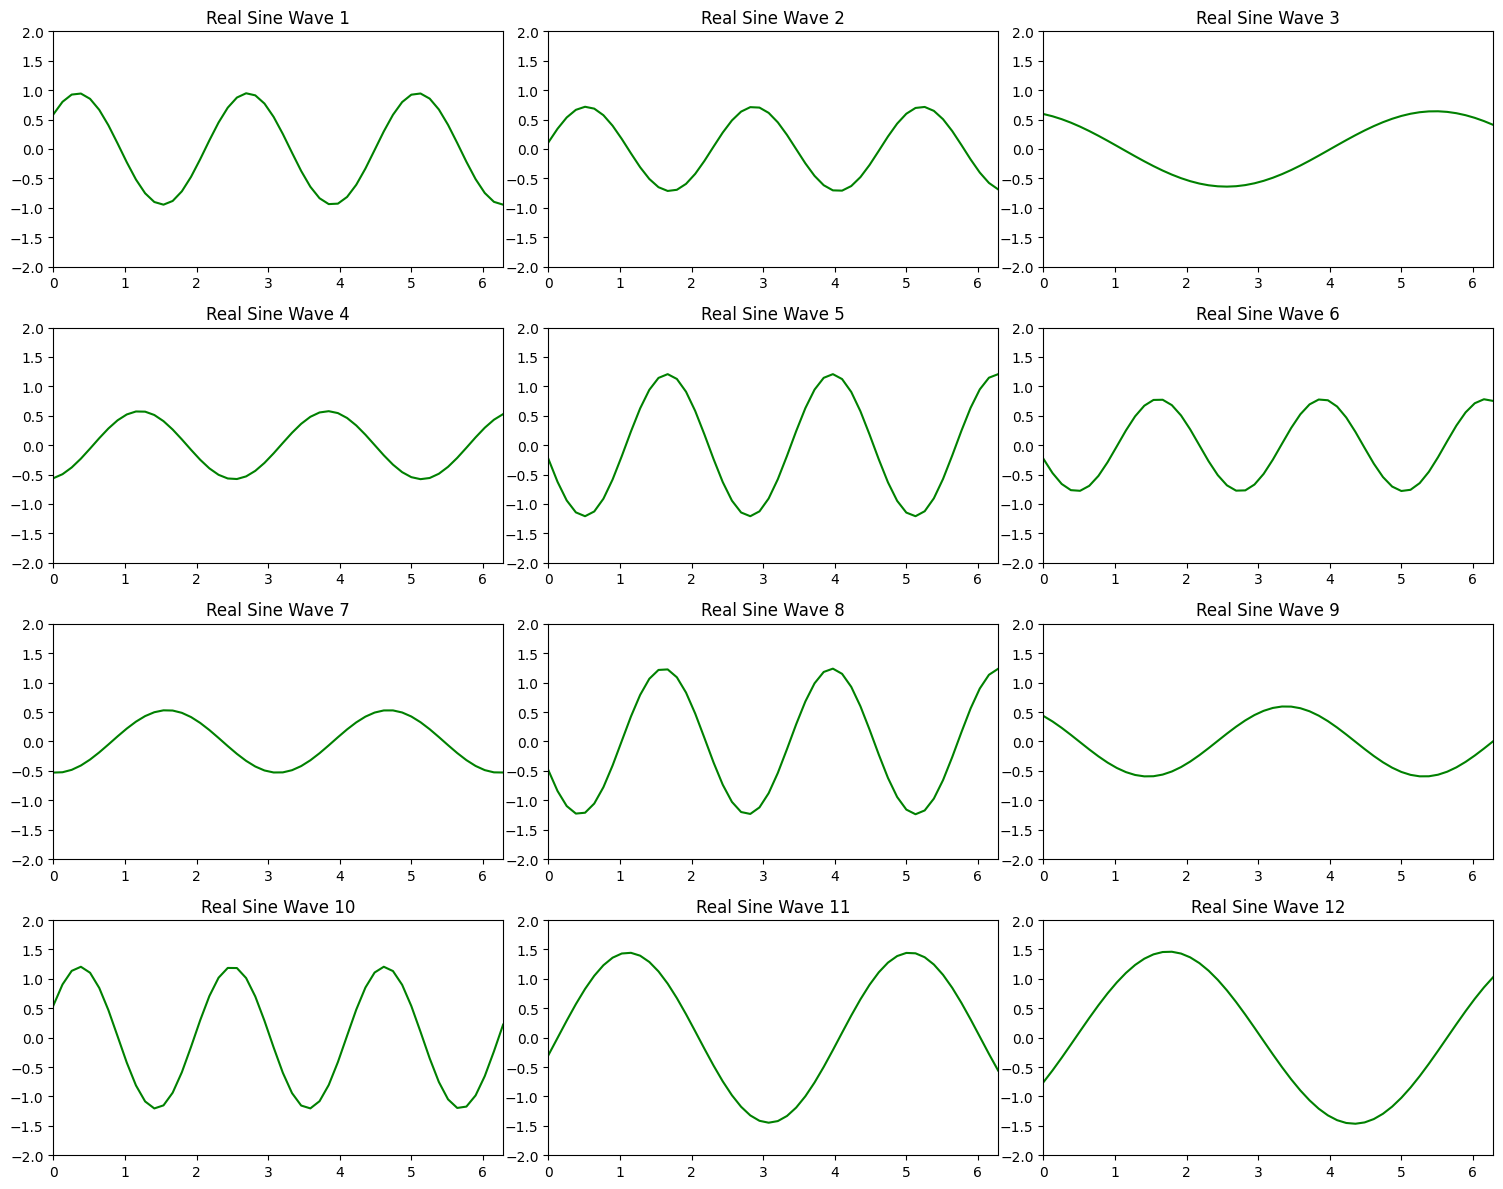

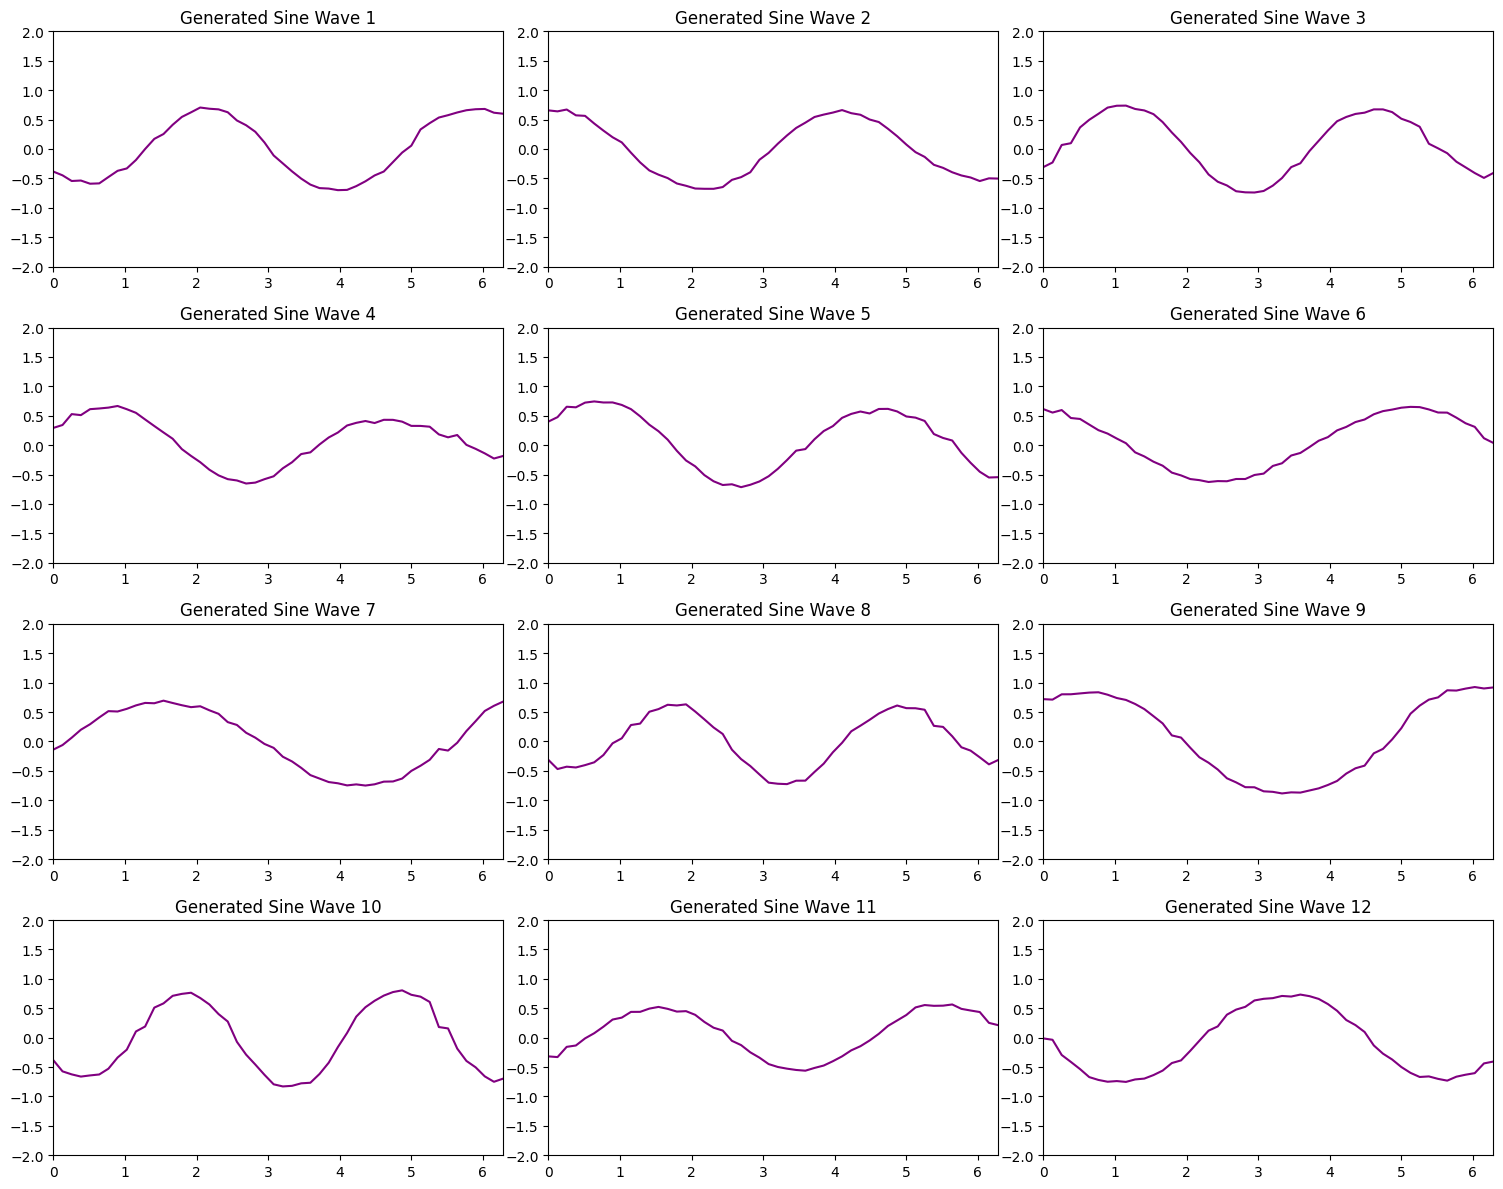

In [50]:
# Training Process
for epoch in range(epochs):
    for _ in range(batch_size):
        # Step 1: Train the Discriminator
        real_data = generate_real_sine_waves(batch_size, output_dim, num_waves=batch_size)
        latent_vectors = torch.randn(batch_size, latent_dim)  # Random latent vectors
        fake_data = generator(latent_vectors)

        real_labels = torch.ones((batch_size, 1))  # Label for real data
        fake_labels = torch.zeros((batch_size, 1))  # Label for fake data

        # Calculate the loss for real and fake data
        real_loss = criterion(discriminator(real_data), real_labels)
        fake_loss = criterion(discriminator(fake_data.detach()), fake_labels)
        d_loss = real_loss + fake_loss

        # Update Discriminator's weights
        optimizer_d.zero_grad()
        d_loss.backward()
        optimizer_d.step()

        # Step 2: Train the Generator
        latent_vectors = torch.randn(batch_size, latent_dim)  # New random latent vectors
        fake_data = generator(latent_vectors)
        g_loss = criterion(discriminator(fake_data), real_labels)  # Fake data should fool the discriminator

        # Update Generator's weights
        optimizer_g.zero_grad()
        g_loss.backward()
        optimizer_g.step()


    # Visualization every 100 epochs
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Discriminator Loss: {d_loss.item()}, Generator Loss: {g_loss.item()}")

        # Visualize real data in green
        real_data_plot = generate_real_sine_waves(batch_size, output_dim, num_waves=12).detach().numpy()
        fig, axs = plt.subplots(4, 3, figsize=(15, 12))  # 4 rows, 3 columns
        axs = axs.flatten()
        for i, ax in enumerate(axs):
            ax.plot(np.linspace(0, 2 * np.pi, output_dim), real_data_plot[i], color='green')  # Green for real data
            ax.set_title(f"Real Sine Wave {i + 1}")
            ax.set_xlim(0, 2 * np.pi)
            ax.set_ylim(-2, 2)
        plt.tight_layout()
        plt.show()

        # Visualizing generated data in purple
        latent_vectors = torch.randn(12, latent_dim)  # Generate new random latent vectors
        fake_data_plot = generator(latent_vectors).detach().numpy()
        fig, axs = plt.subplots(4, 3, figsize=(15, 12))  # 4 rows, 3 columns
        axs = axs.flatten()
        for i, ax in enumerate(axs):
            ax.plot(np.linspace(0, 2 * np.pi, output_dim), fake_data_plot[i], color='purple')  # Purple for synthetic data
            ax.set_title(f"Generated Sine Wave {i + 1}")
            ax.set_xlim(0, 2 * np.pi)
            ax.set_ylim(-2, 2)
        plt.tight_layout()
        plt.show()

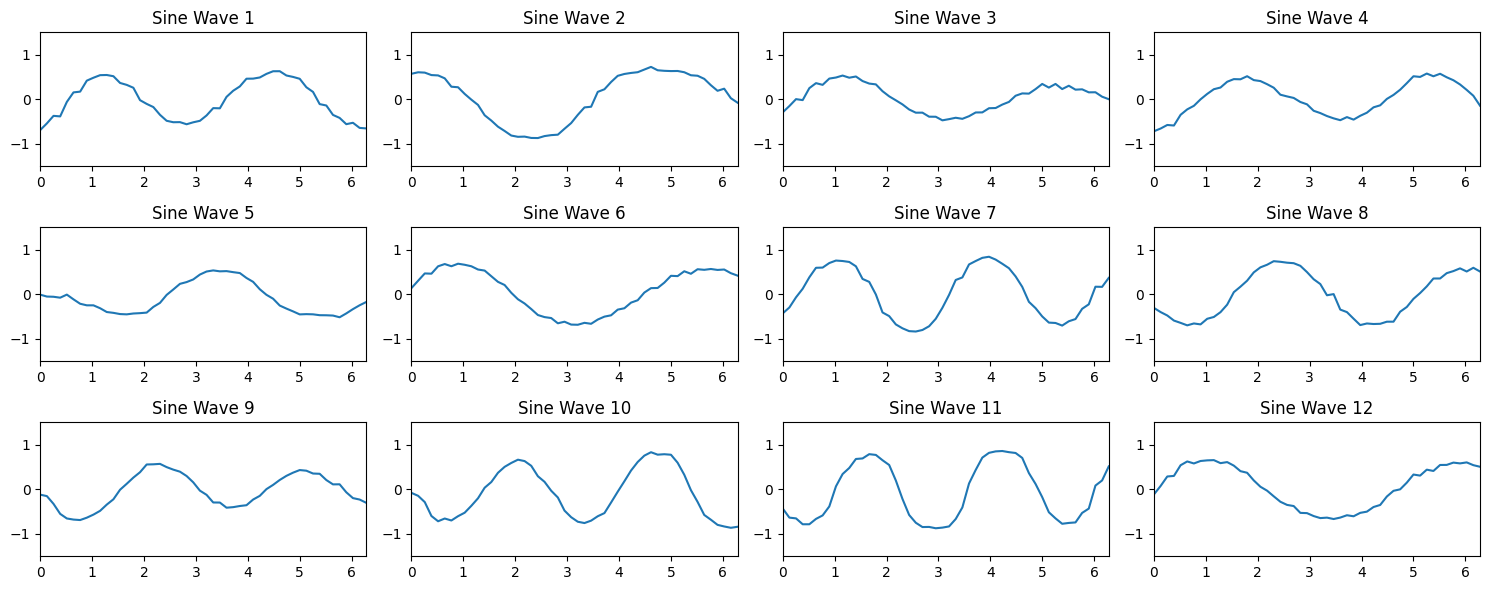

In [51]:
# Generate and plot the final generated Sine Waves

def plot_final_synthetic_data(generator, latent_dim, output_dim, n=12):

    # Generate final synthetic data, Sine Waves
    final_fake_data = generator(torch.randn(n, latent_dim)).detach().numpy()

    # Create subplots to visualize synthetic sine waves
    cols = 4  # Number of columns in the subplot grid
    rows = n // cols  # Calculate number of rows needed
    fig, axs = plt.subplots(rows, cols, figsize=(15, 6))
    axs = axs.flatten()  # Flatten to easily index subplots

    for i in range(n):
        axs[i].plot(np.linspace(0, 2 * np.pi, output_dim), final_fake_data[i])
        axs[i].set_title(f"Sine Wave {i + 1}")
        axs[i].set_xlim(0, 2 * np.pi)
        axs[i].set_ylim(-1.5, 1.5)

    # Hide unused subplots (if any)
    for j in range(n, len(axs)):
        axs[j].axis('off')

    plt.tight_layout()
    plt.show()

# Call the function after training
plot_final_synthetic_data(generator, latent_dim, output_dim, n=12)


###**Conclusion and Applications:**

1. The experiment demonstrates the capability of GANs to generate realistic 1D data distributions.
2. It provides a foundation for extending GANs to more complex data like images or time-series.
3. It highlights the potential of GANs in data augmentation and synthetic data generation for machine learning tasks.